# Query for Spectraction Results in OGA

 work with Weakly_2023_11
- use jupyter kernel LSST
- author : Sylvie Dagoret-Campagne
- affiliation : IJCLab
- creation date : 2023/03/30
- last update : 2023/04/04

- Spectractor https://github.com/lsst/Spectractor/
- Spectractor Version 2.4
- branch lsst-dev
- available in version w_2023_11 by default


In [1]:
! eups list -s | grep LOCAL

atmospec              LOCAL:/home/d/dagoret/repos/repos_w_2023_11/atmospec 	setup
eups                  LOCAL:/opt/lsst/software/stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-5.1.0/eups 	setup


In [2]:
! eups list -s lsst_distrib

   gdf42428520+c82c1836b5 	current w_2023_11 setup


In [3]:
import h5py

In [4]:
import lsst.daf.butler as dafButler
#import lsst.summit.utils.butlerUtils as butlerUtils

In [5]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.colors import LogNorm
import pandas as pd

import matplotlib.ticker                         # here's where the formatter is
import os
import re
import pandas as pd

plt.rcParams["figure.figsize"] = (4,3)
plt.rcParams["axes.labelsize"] = 'xx-large'
plt.rcParams['axes.titlesize'] = 'xx-large'
plt.rcParams['xtick.labelsize']= 'xx-large'
plt.rcParams['ytick.labelsize']= 'xx-large'

In [6]:
import pickle

In [7]:
from astropy.time import Time
import astropy.units as u

## Config

In [8]:
FLAG_MOUNT_ERRORS= True

### Butler

In [9]:
#repo =  "/sdf/group/rubin/repo/main"
#repo = "/sdf/group/rubin/repo/oga/"
repo = "/repo/embargo/"
butler = dafButler.Butler(repo)
registry = butler.registry

### Date & Filter & Disperser & collection

- make your choice

In [10]:
DateToRuncollection = {

 # september 2022
 20220912 :  "u/dagoret/BPS_manyspectro_v60", # Missing collection
 20220913 :  "u/dagoret/BPS_manyspectro_v61", # Missing collection
 20220914 :  "u/dagoret/BPS_manyspectro_v62", # Missing collection  
    
 20220927 :  "u/dagoret/BPS_manyspectro_v63", # Mount errors available, mitigé
 20220928 :  "u/dagoret/BPS_manyspectro_v64", # Mount errors available, very nice spectra
 20220929 :  "u/dagoret/BPS_manyspectro_v65", # Mount errors available, very nice spectra
    
    
 # october 2022
 20221012 :  "u/dagoret/BPS_manyspectro_v56", # mount errors , nice
 20221025 :  "u/dagoret/BPS_manyspectro_v57", # mount errors, very bad spectra
 20221026 :  "u/dagoret/BPS_manyspectro_v58", # mount errors,  nice spectra
 20221027 :  "u/dagoret/BPS_manyspectro_v59", # mount errors,  nice spectra
    
 # november 2022
 20221109 :  "u/dagoret/BPS_manyspectro_v53", # nice
 20221110 :  "u/dagoret/BPS_manyspectro_v54", # mount errors available, many bad rec spectra
 20221123 :  "u/dagoret/BPS_manyspectro_v55", # mount errors , nice   
    
 # december 2022   
 20221207 :  "u/dagoret/BPS_manyspectro_v48",
 20221208 :  "u/dagoret/BPS_manyspectro_v49",
 20221209 :  "u/dagoret/BPS_manyspectro_v50", 
 20221210 :  "u/dagoret/BPS_manyspectro_v51", 
 20221212 :  "u/dagoret/BPS_manyspectro_v52",    
    
 #January 2023 
 20230117 :  "u/dagoret/BPS_manyspectro_v79", # no mount errors
 20230118 :  "u/dagoret/BPS_manyspectro_v80", # no mount error
 20230119 :  "u/dagoret/BPS_manyspectro_v77", # no mount errors
 20230131 :  "u/dagoret/BPS_manyspectro_v78", # missing for moment

 #february 2023
 20230214 :  "u/dagoret/BPS_manyspectro_v42",
 20230215 :  "u/dagoret/BPS_manyspectro_v43", # mount errors
 20230216 :  "u/dagoret/BPS_manyspectro_v44", # mount errors 
 20230228 :  "u/dagoret/BPS_manyspectro_v70",
    
 #march 2023  
 20230301 :  "u/dagoret/BPS_manyspectro_v71", 
 20230302 :  "u/dagoret/BPS_manyspectro_v72", 
 20230315 :  "u/dagoret/BPS_manyspectro_v73", 
 20230316 :  "u/dagoret/BPS_manyspectro_v74",    
    
}

In [11]:
DATE = 20230119
my_collection = DateToRuncollection[DATE]

filterdispersername = "empty~holo4_003"

#RUNSELECTION = 20230330
RUNSELECTION = 20230403

# List of Dataset types avalaible in my collection

## List of dataset types

In [12]:
list(registry.queryDatasetTypes("*spec*"))

[DatasetType('atmospecCentroid', {band, instrument, detector, physical_filter, visit}, StructuredDataDict),
 DatasetType('spectraction', {band, instrument, detector, physical_filter, visit}, Spectraction),
 DatasetType('spectractorImage', {band, instrument, detector, physical_filter, visit}, SpectractorImage),
 DatasetType('spectractorSpectrum', {band, instrument, detector, physical_filter, visit}, SpectractorSpectrum)]

## list of datasets

In [13]:
list(registry.queryDatasets("*spec*", collections=[my_collection]))[:10]

[DatasetRef(DatasetType('atmospecCentroid', {band, instrument, detector, physical_filter, visit}, StructuredDataDict), {instrument: 'LATISS', detector: 0, visit: 2023011900189, ...}, id=834309fd-945b-486a-a5a9-c7f787e8ccc3, run='u/dagoret/BPS_manyspectro_v77/20230404T081336Z'),
 DatasetRef(DatasetType('atmospecCentroid', {band, instrument, detector, physical_filter, visit}, StructuredDataDict), {instrument: 'LATISS', detector: 0, visit: 2023011900326, ...}, id=2494a8ef-0985-40c0-952b-724e4b5c5a97, run='u/dagoret/BPS_manyspectro_v77/20230404T081336Z'),
 DatasetRef(DatasetType('atmospecCentroid', {band, instrument, detector, physical_filter, visit}, StructuredDataDict), {instrument: 'LATISS', detector: 0, visit: 2023011900402, ...}, id=18b8b87b-13be-44ec-82aa-13bdd77c6150, run='u/dagoret/BPS_manyspectro_v77/20230404T081336Z'),
 DatasetRef(DatasetType('atmospecCentroid', {band, instrument, detector, physical_filter, visit}, StructuredDataDict), {instrument: 'LATISS', detector: 0, visit: 2

### Spectractor

In [14]:
configmode = "PSF2DFFM_REBIN2"
#configmode = "PSF2DFFM_REBIN1"
#ext="_b"
specver="specV2.4"

https://www.pythonforthelab.com/blog/how-to-use-hdf5-files-in-python/

In [15]:
#summary_file = f"summaryspectra_{DATE}-{filterdispersername}-{configmode}-oga.csv"
summary_file = f"summaryspectra_{DATE}-{filterdispersername}-{configmode}-{specver}-oga.csv"
output_file_h5 = f"allspectra_{DATE}-{filterdispersername}-{configmode}-{specver}-oga.hdf5"

### The collection

In [16]:
datasetRefs = registry.queryDatasets(datasetType='spectractorSpectrum', collections=my_collection, where= "instrument='LATISS'")

In [17]:
# following line not possible in OGA
#butler = butlerUtils.makeDefaultLatissButler(extraCollections=[my_collection])

In [18]:
if FLAG_MOUNT_ERRORS:
    df_mounterrors = pd.read_csv("mountErrors.csv")
    df=df_mounterrors[df_mounterrors["date_obs"] == DATE ]
    if len(df) == 0:
        FLAG_MOUNT_ERRORS = False
        

In [19]:
df_mounterrors

Unnamed: 0    idx  date_obs  seq       exposure  status    az_rms  \
0             437    437  20220908   66  2022090800066    True  0.040777   
1             444    444  20220908   73  2022090800073    True  0.011192   
2             447    447  20220912    3  2022091200003    True  0.006601   
3             516    516  20220912   72  2022091200072    True  0.004987   
4             522    522  20220912   78  2022091200078    True  0.098272   
...           ...    ...       ...  ...            ...     ...       ...   
16645       43253  43253  20230321   43  2023032100043    True  0.010867   
16646       43254  43254  20230321   44  2023032100044    True  0.010794   
16647       43255  43255  20230321   45  2023032100045    True  0.023044   
16648       43256  43256  20230321   46  2023032100046    True  0.265174   
16649       43262  43262  20230321   52  2023032100052    True  0.214062   

         el_rms   rot_rms  image_az_rms  image_el_rms  image_rot_rms  
0      0.026023  0.291703      0.020020      0.026023       0.000396  
1      0.007489  0.614963      0.005322      0.007489       0.000835  
2      0.005453  0.706174      0.005130      0.005453       0.000959  
3      0.004895  0.159655      0.003876      0.004895       0.000217  
4      0.052172  0.148901      0.048586      0.052172       0.000202  
...         ...       ...           ...           ...            ...  
16645  0.011750  0.004012      0.009384      0.011750       0.000005  
16646  0.007538  0.007706      0.009318      0.007538       0.000010  
16647  0.014788  0.300176      0.019884      0.014788       0.000407  
16648  0.060447  0.004043      0.246965      0.060447       0.000005  
16649  0.049427  0.007835      0.198238      0.049427       0.000011  

[16650 rows x 12 columns]

In [20]:
df

Empty DataFrame
Columns: [Unnamed: 0, idx, date_obs, seq, exposure, status, az_rms, el_rms, rot_rms, image_az_rms, image_el_rms, image_rot_rms]
Index: []

In [21]:
FLAG_MOUNT_ERRORS 

False

## Loop on exposures

In [22]:
#outfile.close()

In [23]:
all_dataId = []     # full data id
all_spec = []       # spectra
all_exposures = []  # exposure number
all_num = []        # sequence numbers
all_h5group = []

hf_outfile =  h5py.File(output_file_h5, 'w') 
  

for i, ref in enumerate(datasetRefs):

    print(f"============= ({i}) ============datasetType = spectraction ============================================")
    print("fullId..................:",ref.dataId.full)
    print("visit...................:",ref.dataId["visit"])
    print("band....................:",ref.dataId["band"])
    print("physical filter.........:",ref.dataId["physical_filter"])
    print("run.....................:",ref.run)
    
    #through old runs
    date_of_run = int(ref.run.split("/")[-1].split("T")[0])
    if date_of_run< RUNSELECTION :
        continue
 
    
    
    the_exposure = ref.dataId["visit"]
    the_day_obs = ref.dataId["visit"]//100_000
    the_seq_num = ref.dataId["visit"]- the_day_obs*100_000    
    the_dataId = {'day_obs': the_day_obs,'seq_num':the_seq_num,'detector':0}
    print(the_dataId)
    
    the_exposure_key = str(the_exposure)
    
    if the_exposure not in all_exposures:
        g = hf_outfile.create_group(the_exposure_key)
        all_h5group.append(g) 
    else:
        print(f">>>>>>  already existing key {the_exposure_key} Skip it !!! ")
        the_exposure_key = the_exposure_key + "_b"
        continue
   
    
    # retrieve the spectrum from Butler
    #spec       = butler.get('spectraction',the_dataId)
    spec = butler.get('spectractorSpectrum', visit=the_exposure, detector=0, collections=my_collection, instrument='LATISS')
    
    # save in collection lists
    all_dataId.append(the_dataId) 
    all_exposures.append(the_exposure)
    all_spec.append(spec)
    all_num.append(the_seq_num)
    

============= (0) ============datasetType = spectraction ============================================
fullId..................: {band: 'white', instrument: 'LATISS', detector: 0, physical_filter: 'empty~holo4_003', visit: 2023011900353}
visit...................: 2023011900353
band....................: white
physical filter.........: empty~holo4_003
run.....................: u/dagoret/BPS_manyspectro_v77/20230404T081336Z
{'day_obs': 20230119, 'seq_num': 353, 'detector': 0}
============= (1) ============datasetType = spectraction ============================================
fullId..................: {band: 'white', instrument: 'LATISS', detector: 0, physical_filter: 'empty~holo4_003', visit: 2023011900326}
visit...................: 2023011900326
band....................: white
physical filter.........: empty~holo4_003
run.....................: u/dagoret/BPS_manyspectro_v77/20230404T081336Z
{'day_obs': 20230119, 'seq_num': 326, 'detector': 0}
============= (2) ============datasetType = sp

In [24]:
hf_outfile.keys()

<KeysViewHDF5 ['2023011900162', '2023011900163', '2023011900180', '2023011900181', '2023011900189', '2023011900190', '2023011900198', '2023011900199', '2023011900226', '2023011900227', '2023011900254', '2023011900255', '2023011900269', '2023011900270', '2023011900278', '2023011900279', '2023011900287', '2023011900288', '2023011900296', '2023011900297', '2023011900305', '2023011900306', '2023011900314', '2023011900315', '2023011900326', '2023011900327', '2023011900335', '2023011900336', '2023011900344', '2023011900345', '2023011900353', '2023011900354', '2023011900362', '2023011900363', '2023011900374', '2023011900375', '2023011900383', '2023011900384', '2023011900392', '2023011900393', '2023011900401', '2023011900402']>

In [25]:
index = 0

spec = all_spec[index]

In [26]:
the_h5group = all_h5group[index] 

In [27]:
d = the_h5group.create_dataset('airmass', data=spec.airmass)

In [28]:
spec.airmass

1.06054117018796

In [29]:
spec.date_obs

'2023-01-20T04:27:40.967500876Z'

In [30]:
spec.cov_matrix.shape

(1137, 1137)

In [31]:
spec.lambdas.shape

(1137,)

In [32]:
spec.data_next_order.shape

(1137,)

In [33]:
spec.chromatic_psf.load_table()

In [34]:
spec.spectrogram_saturation

22666.66666666667

In [35]:
spec.chromatic_psf.plot_summary()

In [36]:
def DumpSpectrum(spec):
    print("--------------------------------------------")
    print("spec.target.label\t",spec.target.label)
    print("spec.filter_label\t",spec.filter_label)
    print("spec.airmass\t",spec.airmass)
    print("spec.date_obs\t",spec.date_obs)
    print("spec.temperature\t",spec.temperature)
    print("spec.pressure\t",spec.pressure)
    print("spec.humidity\t",spec.humidity)    
    #print("spec.ra\t",spec.ra)
    print("spec.dec\t",spec.dec)
    print("spec.hour_angle\t",spec.hour_angle)
    print("spec.parallactic_angle\t",spec.parallactic_angle)
    print("spec.camera_angle\t", spec.camera_angle)
    print("--------------------------------------------")
    print("spec.order\t",spec.order)
    print("spec.lambdas\t",spec.lambdas)
    print("spec.data\t",spec.data)
    print("spec.err\t",spec.err)
    print("spec.covmatrix\t",spec.cov_matrix)
    print("--------------------------------------------")
    print("spec.data_next_order\t",spec.data_next_order)
    print("spec.err_next_order\t",spec.err_next_order)

In [37]:
def AddDataSetsInGroup(spec,h5group):
  
   
    #spectrum

    h5group.attrs['spec_target_label'] = spec.target.label
    h5group.attrs['spec_filter_label'] = spec.filter_label
    h5group.attrs["spec_date_obs"] = spec.date_obs
    h5group.attrs["spec_airmass"] = spec.airmass 
    h5group.attrs["spec_temperature"] = spec.temperature
    h5group.attrs["spec_pressure"] = spec.pressure
    h5group.attrs["spec_humidity"] = spec.humidity
    h5group.attrs["spec_dec"] = spec.dec
    h5group.attrs["spec_hour_angle"] = spec.hour_angle
    h5group.attrs["spec_parallactic_angle"] = spec.parallactic_angle
    h5group.attrs["spec_camera_angle"] = spec.camera_angle
    h5group.attrs["spec_order"] = spec.order
    
    
    d = h5group.create_dataset("spec_lambdas",data=spec.lambdas,compression="gzip", compression_opts=9)
    d = h5group.create_dataset("spec_data",data=spec.data,compression="gzip", compression_opts=9)
    d = h5group.create_dataset("spec_err",data=spec.err,compression="gzip", compression_opts=9)
    d = h5group.create_dataset("spec_covmatrix",data=spec.cov_matrix,compression="gzip", compression_opts=9)
    d = h5group.create_dataset("spec_data_next_order",data=spec.data_next_order,compression="gzip", compression_opts=9)
    d = h5group.create_dataset("spec_err_next_order",data=spec.err_next_order,compression="gzip", compression_opts=9)
    
    # spectrogram
    
    d = h5group.create_dataset("spec_spectrogram",data=spec.spectrogram,compression="gzip", compression_opts=9)
    d = h5group.create_dataset("spec_spectrogram_bgd",data=spec.spectrogram_bgd,compression="gzip", compression_opts=9)
    d = h5group.create_dataset("spec_spectrogram_bgd_rms",data=spec.spectrogram_bgd_rms,compression="gzip", compression_opts=9)
    d = h5group.create_dataset("spec_spectrogram_err",data=spec.spectrogram_err,compression="gzip", compression_opts=9)
    d = h5group.create_dataset("spec_spectrogram_residuals",data=spec.spectrogram_residuals,compression="gzip", compression_opts=9)
    d = h5group.create_dataset("spec_spectrogram_fit",data=spec.spectrogram_fit,compression="gzip", compression_opts=9)
    
    
    h5group.attrs["spec_spectrogram_x0"]=spec.spectrogram_x0
    h5group.attrs["spec_spectrogram_y0"]=spec.spectrogram_y0
    h5group.attrs["spec_spectrogram_xmin"]=spec.spectrogram_xmin
    h5group.attrs["spec_spectrogram_xmax"]=spec.spectrogram_xmax
    h5group.attrs["spec_spectrogram_ymin"]=spec.spectrogram_ymin
    h5group.attrs["spec_spectrogram_ymax"]=spec.spectrogram_ymax
    h5group.attrs["spec_spectrogram_deg"]=spec.spectrogram_deg
    h5group.attrs["spec_spectrogram_saturation"]=spec.spectrogram_saturation      
    h5group.attrs["spec_spectrogram_Nx"]=spec.spectrogram_Nx
    h5group.attrs["spec_spectrogram_Ny"]=spec.spectrogram_Ny
    
    
    # header
    
    h5group.attrs["spec_header_target"]=spec.header["TARGET"]
    h5group.attrs["spec_header_redshift"]=spec.header["REDSHIFT"]
    h5group.attrs['spec_header_grating']=spec.header["GRATING"]
    h5group.attrs["spec_header_rotangle"]=spec.header["ROTANGLE"]
    h5group.attrs["spec_header_d2ccd"]=spec.header["D2CCD"]
    h5group.attrs["spec_header_lshift"]=spec.header["LSHIFT"]
    h5group.attrs["spec_header_parangle"]=spec.header["PARANGLE"]
    h5group.attrs["spec_header_targetx"]=spec.header["TARGETX"]
    h5group.attrs["spec_header_targety"]=spec.header["TARGETY"]
    h5group.attrs["spec_header_lbda_ref"]=spec.header["LBDA_REF"]
    h5group.attrs["spec_header_pixshift"]=spec.header["PIXSHIFT"]
    h5group.attrs["spec_header_psf_reg"]=spec.header["PSF_REG"]
    h5group.attrs["spec_header_trace_r"]=spec.header["TRACE_R"]   
    h5group.attrs["spec_header_chi2_fit"]=spec.header["CHI2_FIT"]   
    h5group.attrs["spec_header_a2_fit"]=spec.header["A2_FIT"]
    h5group.attrs["spec_header_am_fit"]=spec.header["AM_FIT"]
    h5group.attrs["spec_header_meanfwhm"]=spec.header["MEANFWHM"]
    h5group.attrs["spec_header_version"]=spec.header["VERSION"]
    h5group.attrs["spec_header_rebin"]=spec.header["REBIN"]
    h5group.attrs['spec_header_date-obs']=spec.header["DATE-OBS"]
    h5group.attrs["spec_header_exptime"]=spec.header["EXPTIME"]
    h5group.attrs["spec_header_airmass"]=spec.header["AIRMASS"] 
    h5group.attrs["spec_header_dec"]=spec.header["DEC"]
    h5group.attrs["spec_header_ha"]=spec.header["HA"]
    h5group.attrs["spec_header_outtemp"]=spec.header["OUTTEMP"] 
    h5group.attrs["spec_header_outpress"]=spec.header["OUTPRESS"] 
    h5group.attrs["spec_header_outhum"]=spec.header["OUTHUM"]
    h5group.attrs["spec_header_filter"]=spec.header["FILTER"]
    h5group.attrs["spec_header_cam_rot"]=spec.header["CAM_ROT"] 
    h5group.attrs["spec_header_s_x0"]=spec.header["S_X0"]
    h5group.attrs["spec_header_s_y0"]=spec.header["S_Y0"]
    h5group.attrs["spec_header_s_xmin"]=spec.header["S_XMIN"]      
    h5group.attrs["spec_header_s_xmax"]=spec.header["S_XMAX"]                                               
    h5group.attrs["spec_header_s_ymin"]=spec.header["S_YMIN"]      
    h5group.attrs["spec_header_s_ymax"]=spec.header["S_YMAX"]                                                                                                                  
    h5group.attrs["spec_header_s_nx"]=spec.header["S_NX"]
    h5group.attrs["spec_header_s_ny"]=spec.header["S_NY"]   
    h5group.attrs["spec_header_s_dec"]=spec.header["S_DEG"]  
    h5group.attrs["spec_header_s_sat"]=spec.header["S_SAT"]      
                                               
    

In [38]:
def AddMountErrorsInGroup(h5group,az_rms,el_rms,rot_rms,image_az_rms,image_el_rms,image_rot_rms):
    h5group.attrs["me_az_rms"]=az_rms
    h5group.attrs["me_el_rms"]=el_rms
    h5group.attrs["me_rot_rms"]=rot_rms
    h5group.attrs["me_image_az_rms"]=image_az_rms
    h5group.attrs["me_image_el_rms"]=image_el_rms
    h5group.attrs["me_image_rot_rms"]=image_rot_rms
        

In [39]:
def AddDataSetsInGroupAndIndexExposure(spec,h5group,index,exposure):

    h5group.attrs["index"]=index
    h5group.attrs["exposure"]=exposure
    
    AddDataSetsInGroup(spec,h5group)

In [40]:
DumpSpectrum(spec)

--------------------------------------------
spec.target.label	 HD074000
spec.filter_label	 empty
spec.airmass	 1.06054117018796
spec.date_obs	 2023-01-20T04:27:40.967500876Z
spec.temperature	 0
spec.pressure	 0
spec.humidity	 0
spec.dec	 -16.3151032616856
spec.hour_angle	 -15.00836809993651
spec.parallactic_angle	 -138.0630338720496
spec.camera_angle	 -43.00106382130298
--------------------------------------------
spec.order	 1
spec.lambdas	 [ 296.67038559  297.38002215  298.08964987 ... 1089.49161699 1090.17535549
 1090.85905883]
spec.data	 [-1.62760257e-15 -2.64446866e-15  1.71185710e-15 ... -2.93531270e-15
 -4.31664239e-15 -3.37092104e-15]
spec.err	 [1.61510978e-15 1.35827090e-15 1.02478236e-15 ... 5.28174493e-16
 6.34143221e-16 7.31449335e-16]
spec.covmatrix	 [[ 2.60857959e-30  2.10921084e-30  1.39903726e-30 ... -2.90558084e-43
  -1.35298785e-43 -5.46915413e-44]
 [ 2.10921084e-30  1.84489984e-30  1.28998159e-30 ... -3.09195013e-43
  -1.71679178e-43 -1.00299516e-43]
 [ 1.39903726e-

# Save all spectra in a single file

In [41]:
exposures_sorted = np.sort(all_exposures)

In [42]:
for idx,spec in enumerate(all_spec):   
    the_exposure = all_exposures[idx]
    the_sorted_index = np.where(exposures_sorted == the_exposure)[0][0]
    AddDataSetsInGroupAndIndexExposure(spec,all_h5group[idx],the_sorted_index,the_exposure)
    if FLAG_MOUNT_ERRORS:
        df_exp_selected = df[df["exposure"] == the_exposure]
        N = len(df_exp_selected)
        if (N)>0:
            az_rms = df_exp_selected["az_rms"].values[0]
            el_rms = df_exp_selected["el_rms"].values[0]
            rot_rms = df_exp_selected["rot_rms"].values[0]
            image_az_rms = df_exp_selected["image_az_rms"].values[0]
            image_el_rms = df_exp_selected["image_el_rms"].values[0]
            image_rot_rms = df_exp_selected["image_rot_rms"].values[0]
            AddMountErrorsInGroup(all_h5group[idx],az_rms,el_rms,rot_rms,image_az_rms,image_el_rms,image_rot_rms)
        else:
            print(f"No error mount for exposure {the_exposure}")
            

In [43]:
hf_outfile.keys()

<KeysViewHDF5 ['2023011900162', '2023011900163', '2023011900180', '2023011900181', '2023011900189', '2023011900190', '2023011900198', '2023011900199', '2023011900226', '2023011900227', '2023011900254', '2023011900255', '2023011900269', '2023011900270', '2023011900278', '2023011900279', '2023011900287', '2023011900288', '2023011900296', '2023011900297', '2023011900305', '2023011900306', '2023011900314', '2023011900315', '2023011900326', '2023011900327', '2023011900335', '2023011900336', '2023011900344', '2023011900345', '2023011900353', '2023011900354', '2023011900362', '2023011900363', '2023011900374', '2023011900375', '2023011900383', '2023011900384', '2023011900392', '2023011900393', '2023011900401', '2023011900402']>

In [44]:
# AddDataSetsInGroup(spec,the_h5group) 
hf_outfile.close() 

## Plot

/tmp/ipykernel_10587/648748315.py:19: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig=plt.figure(figsize=(16,4))


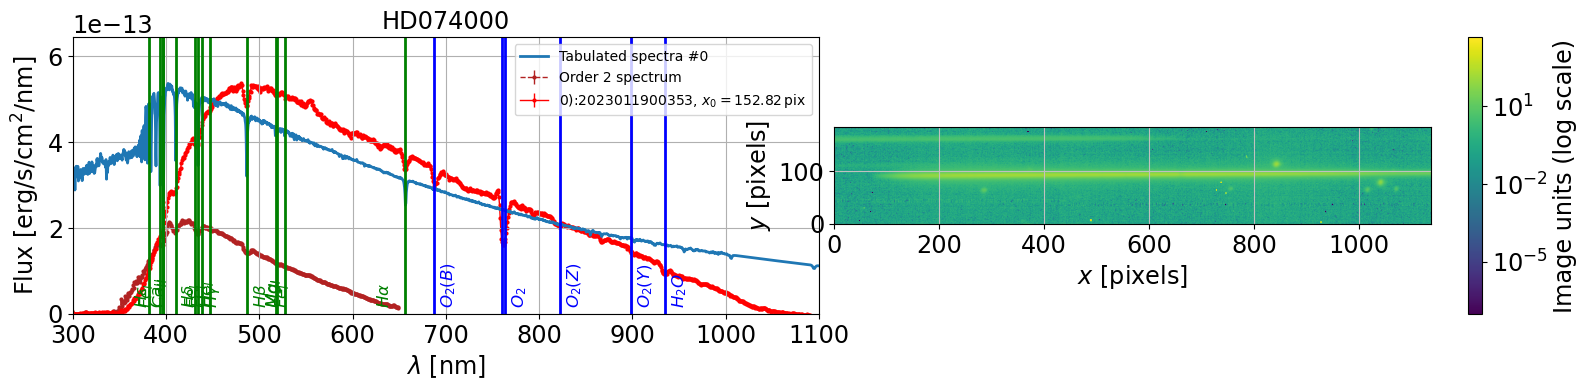

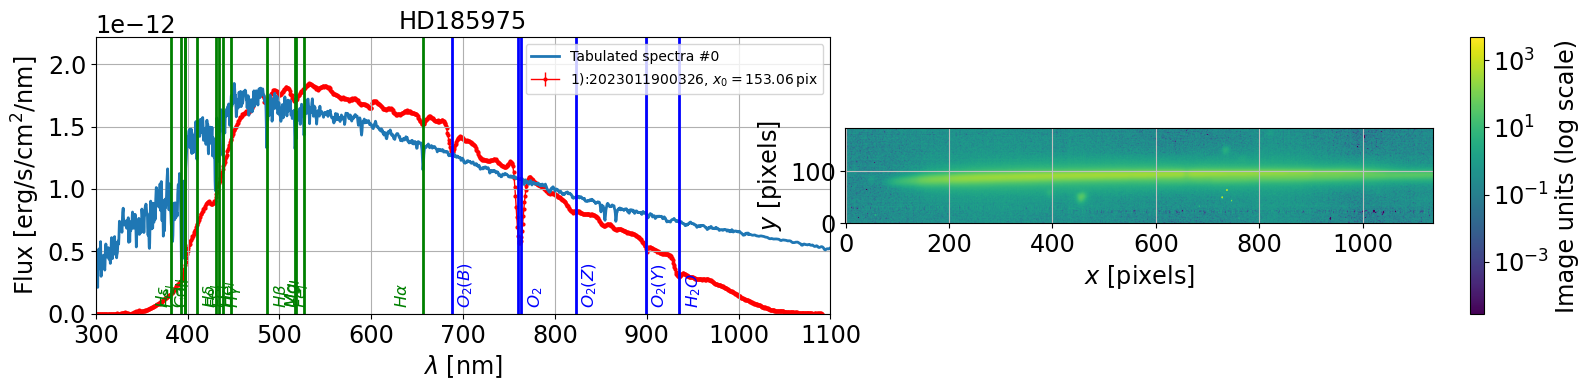

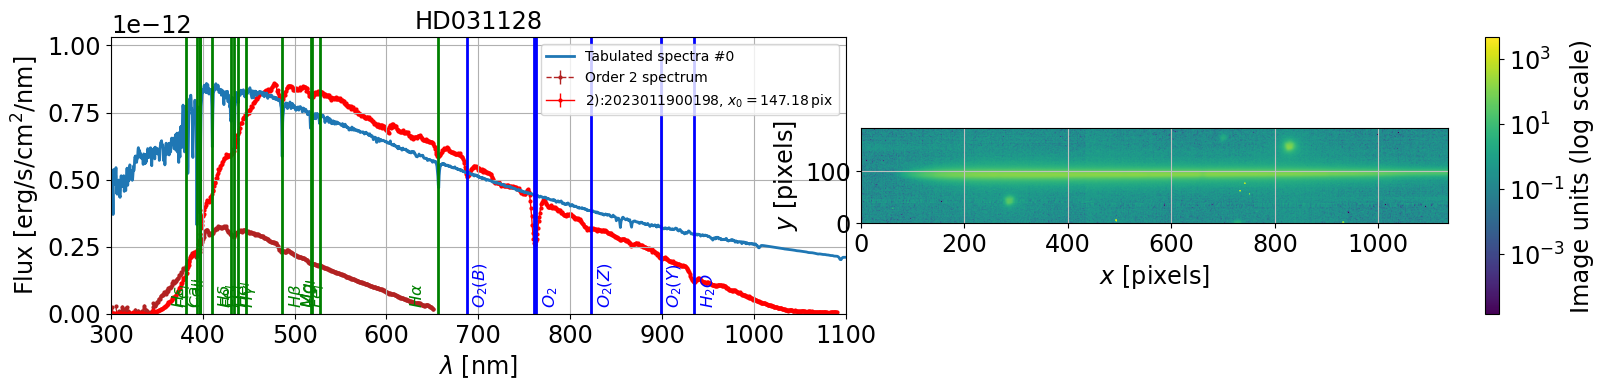

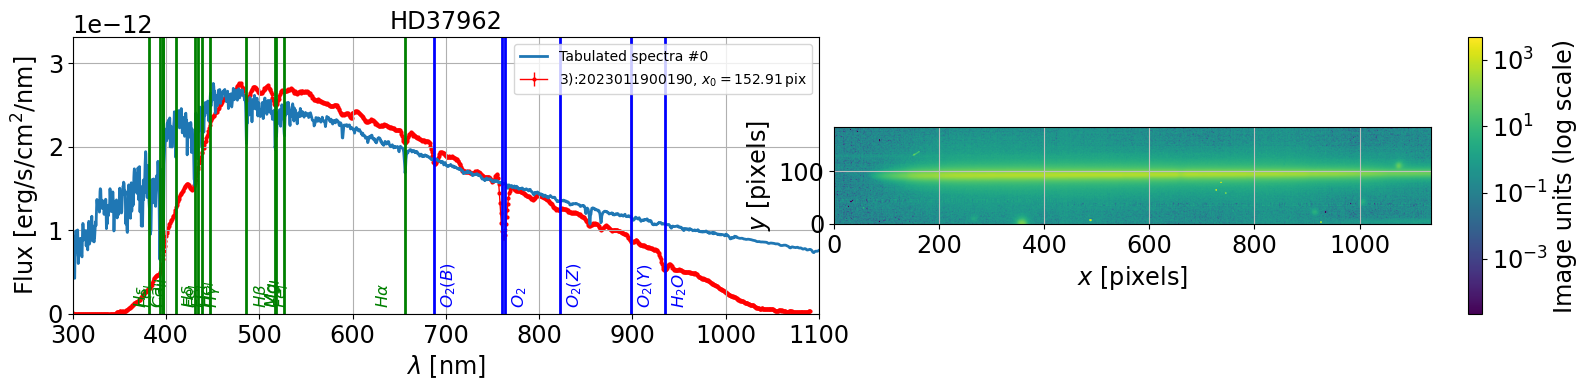

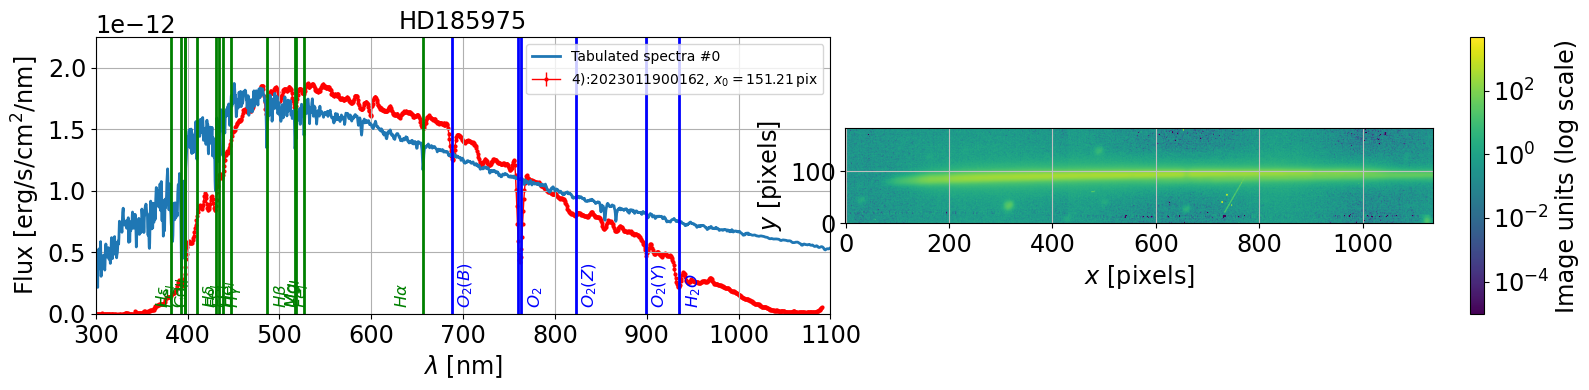

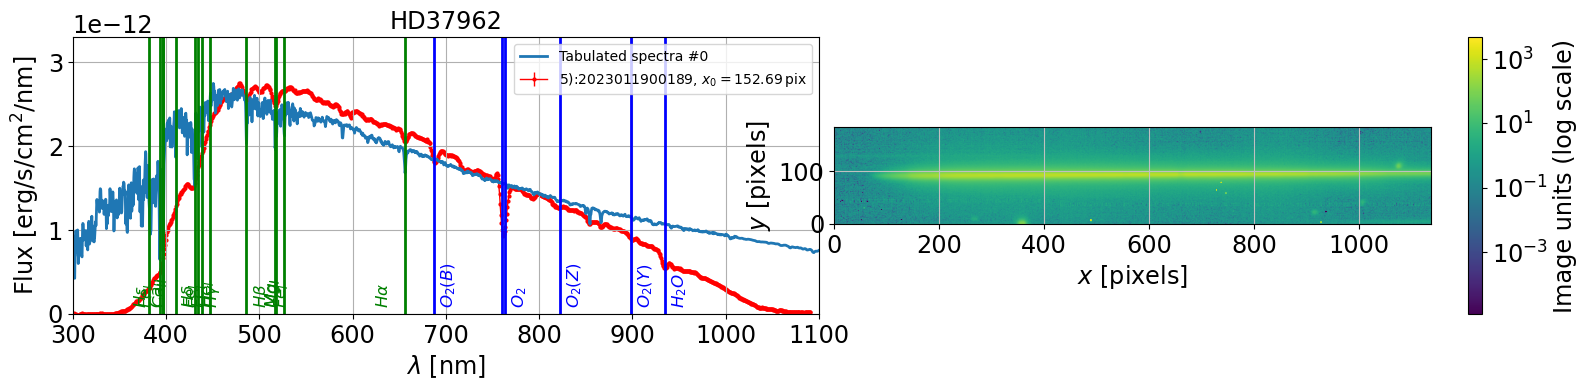

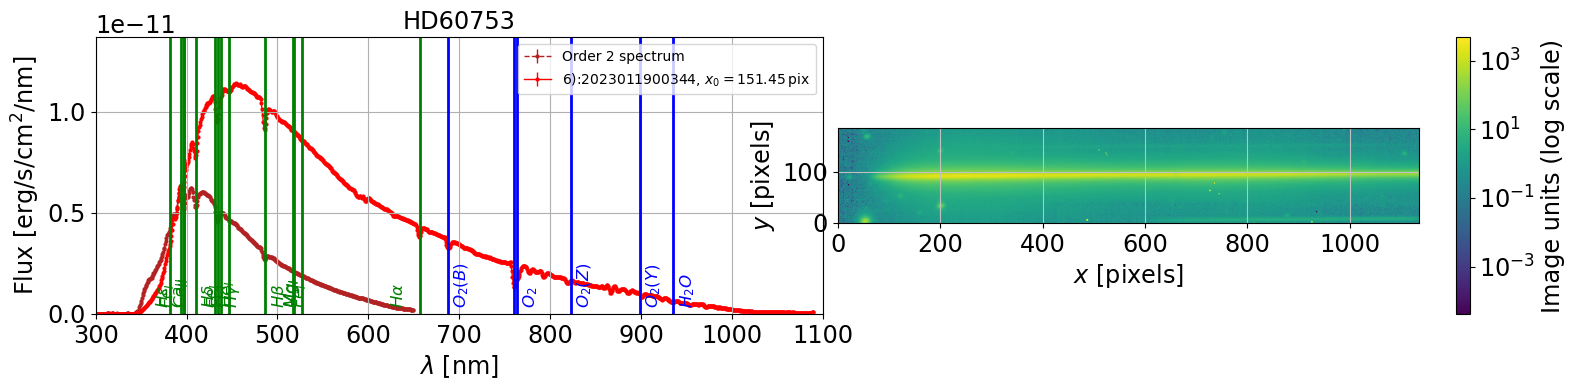

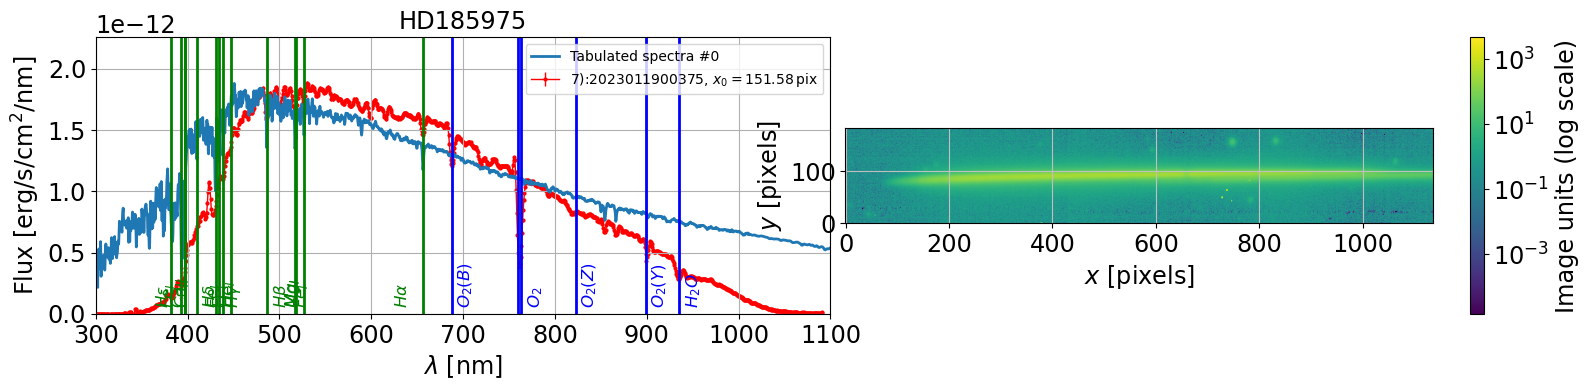

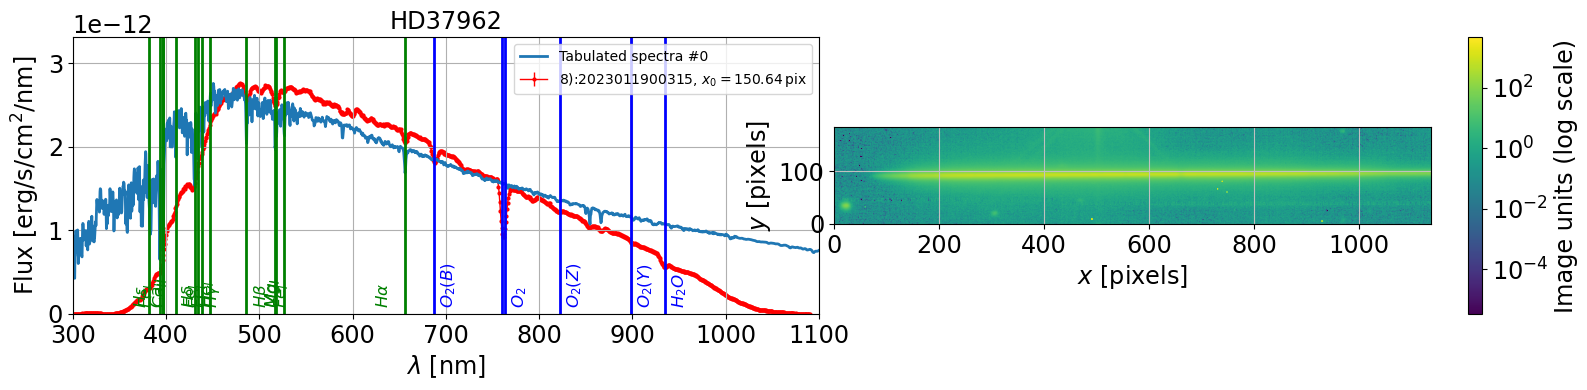

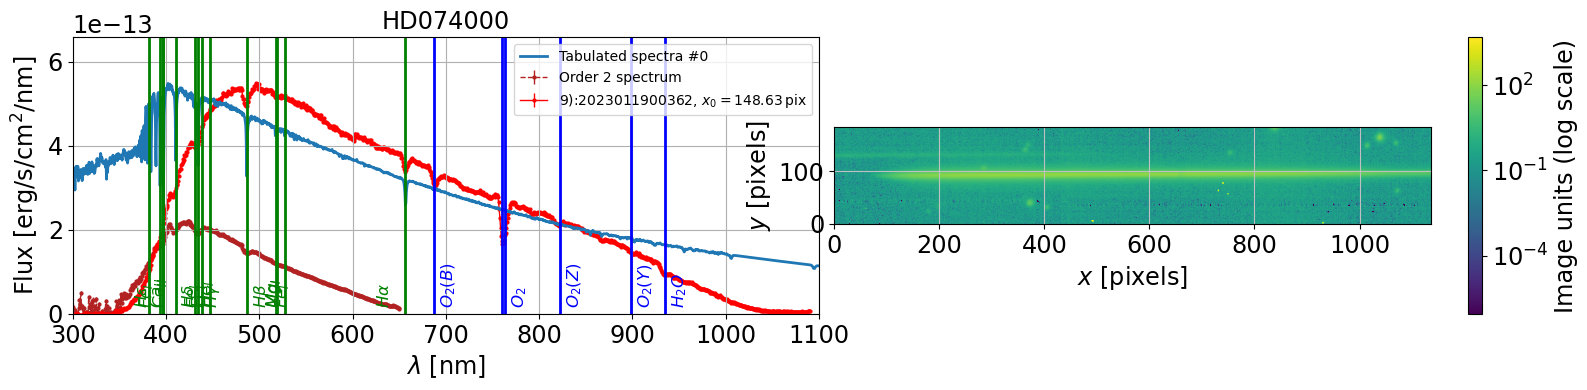

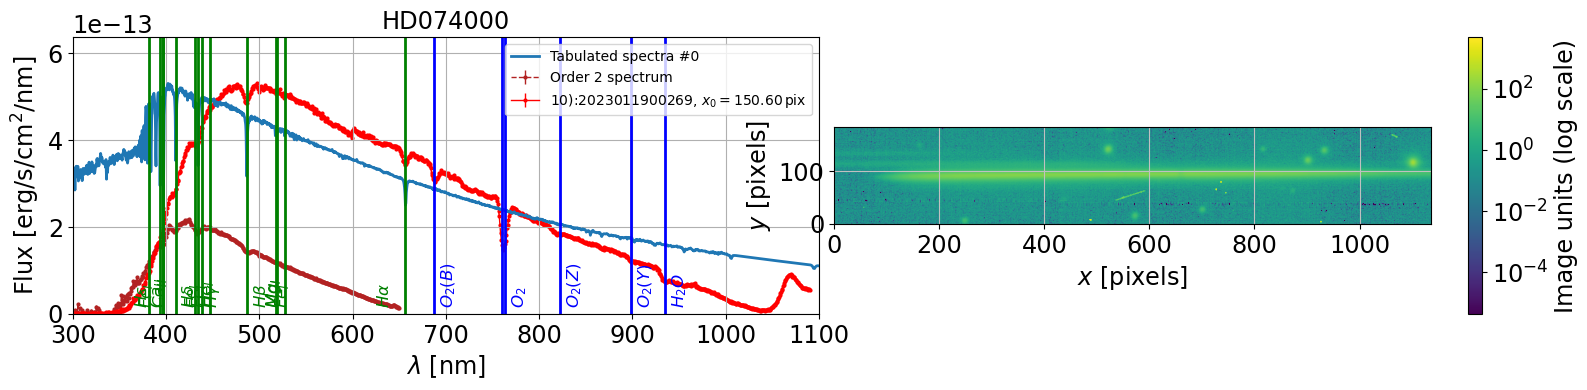

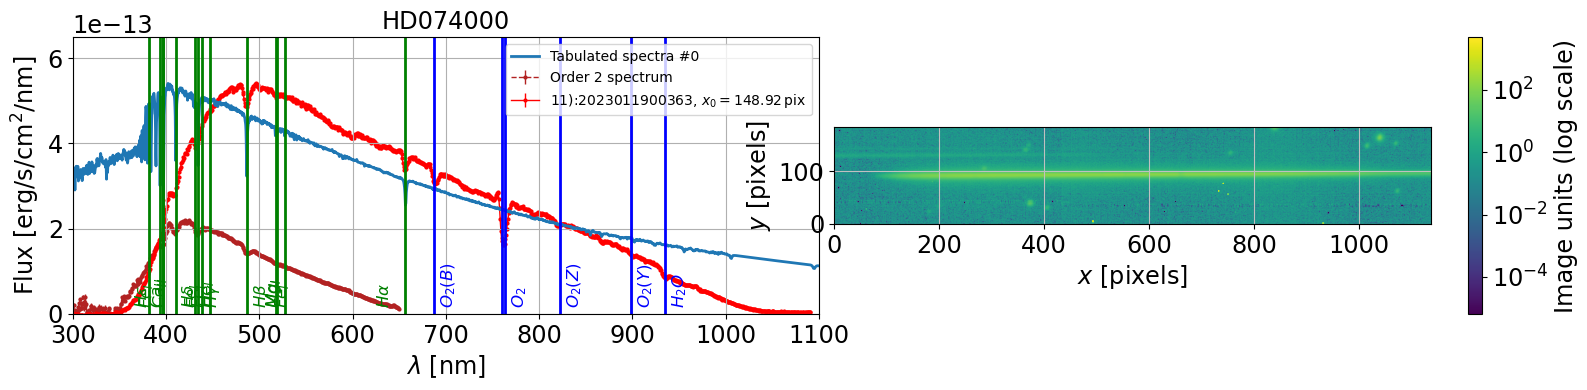

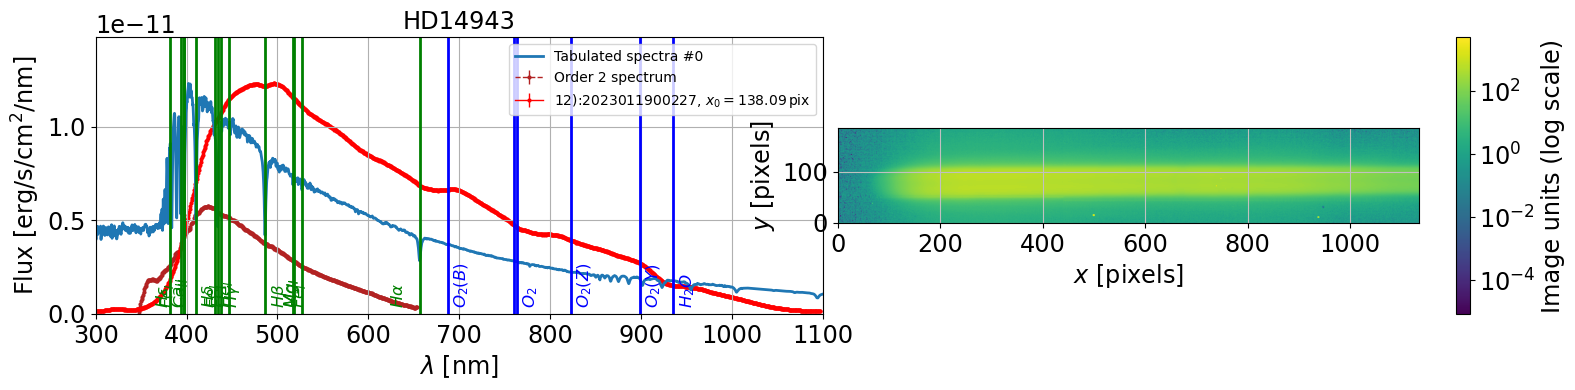

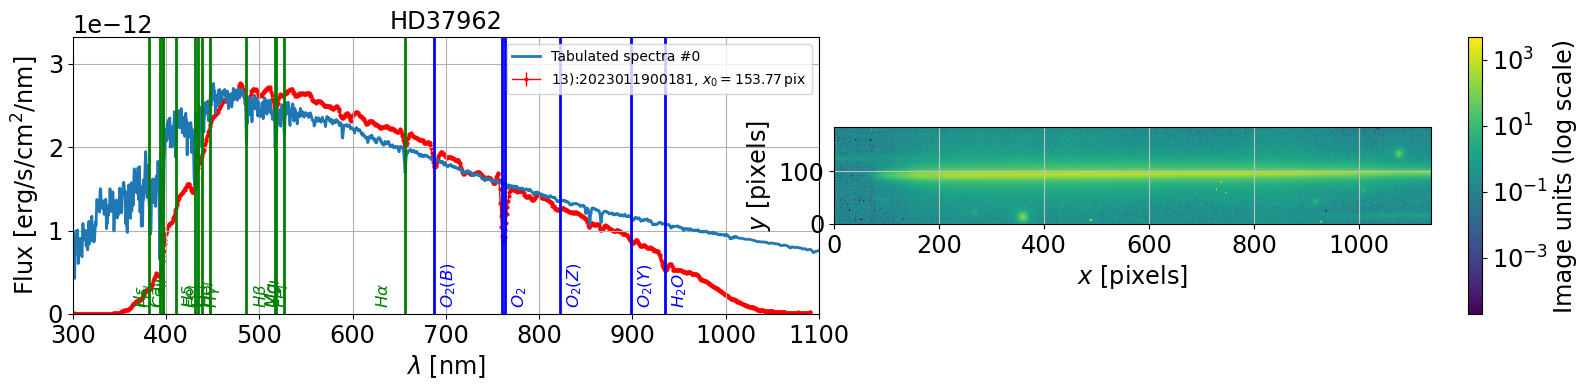

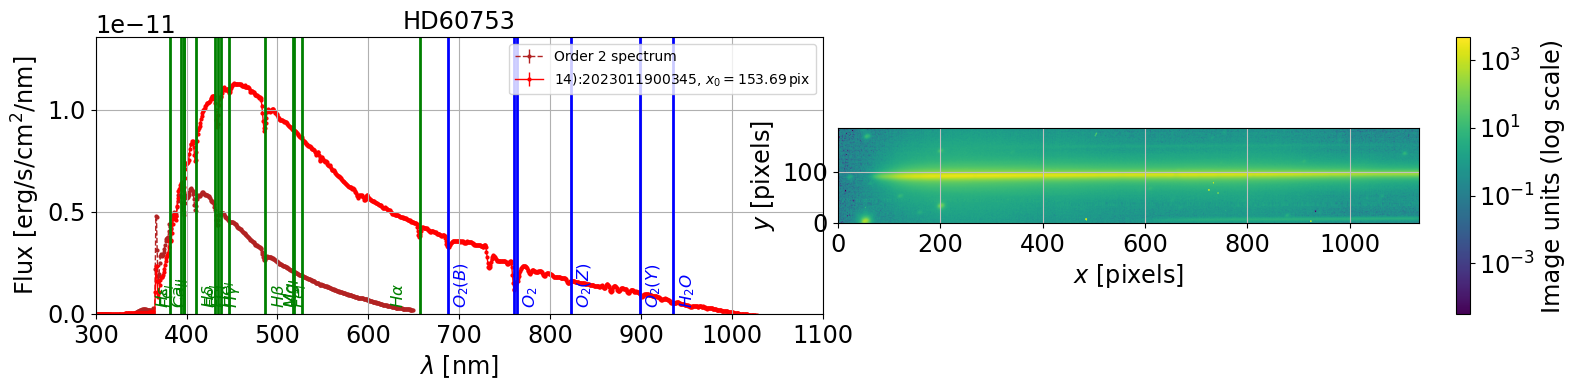

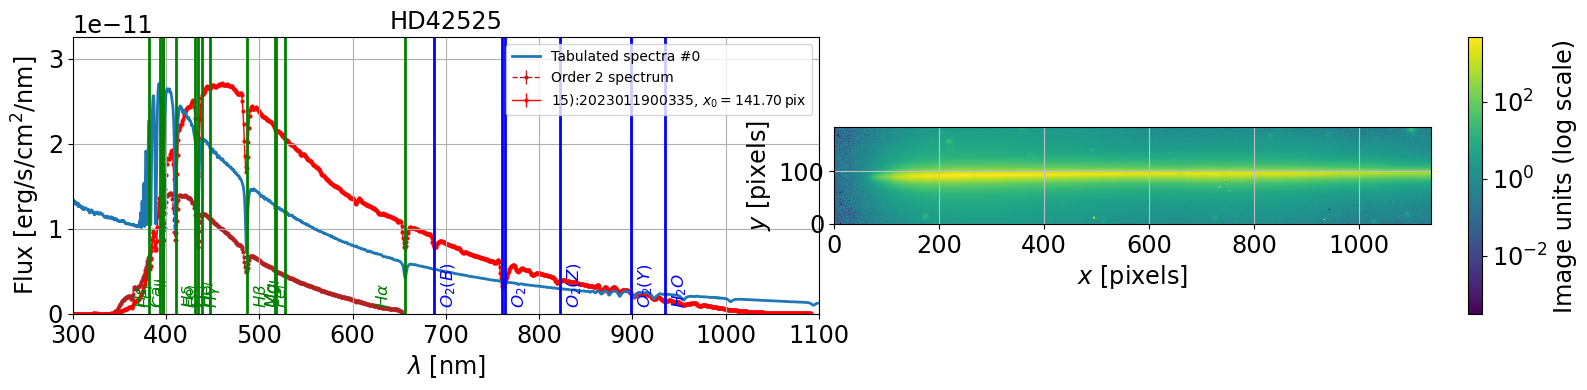

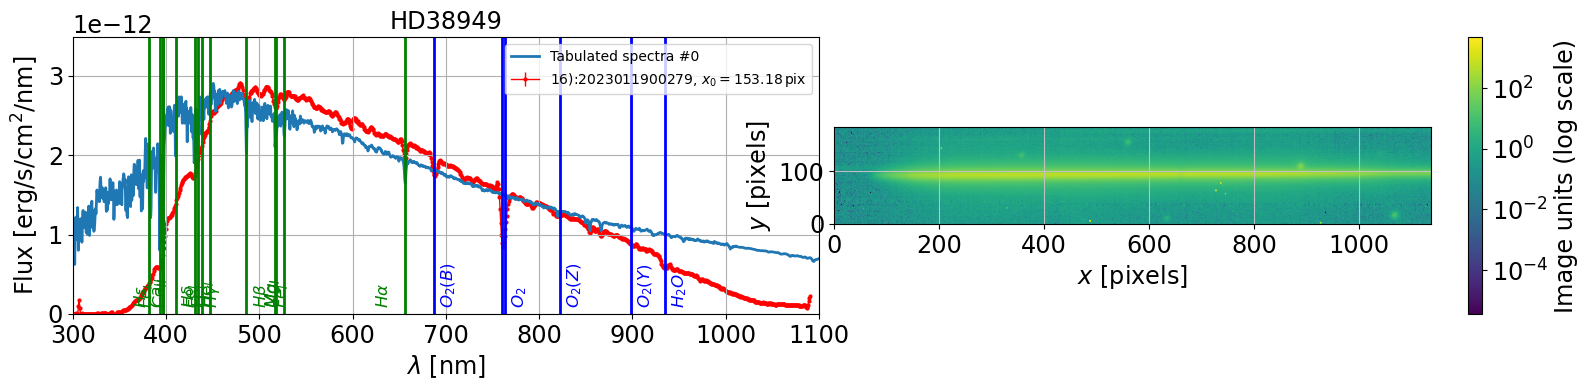

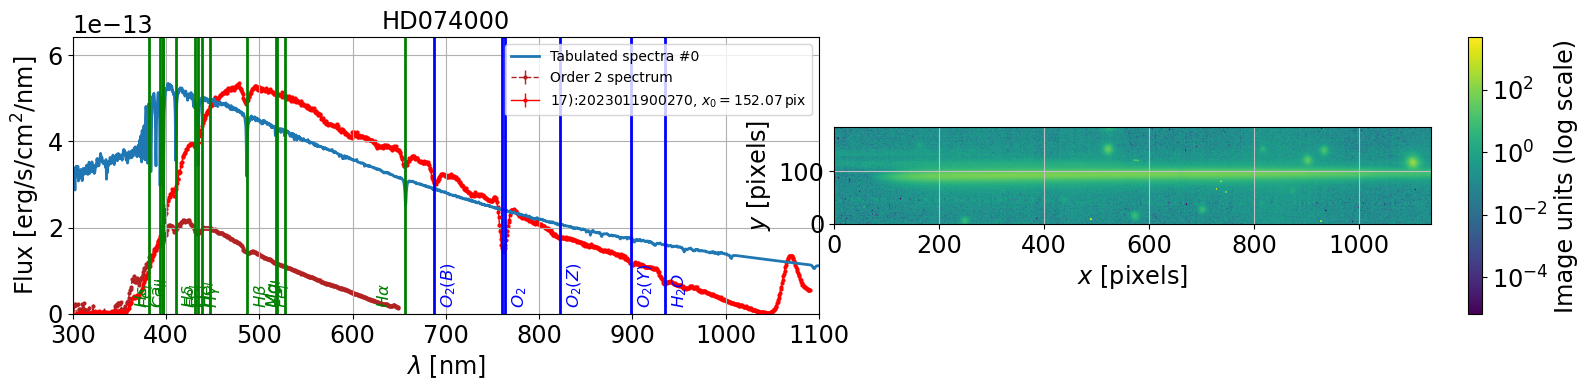

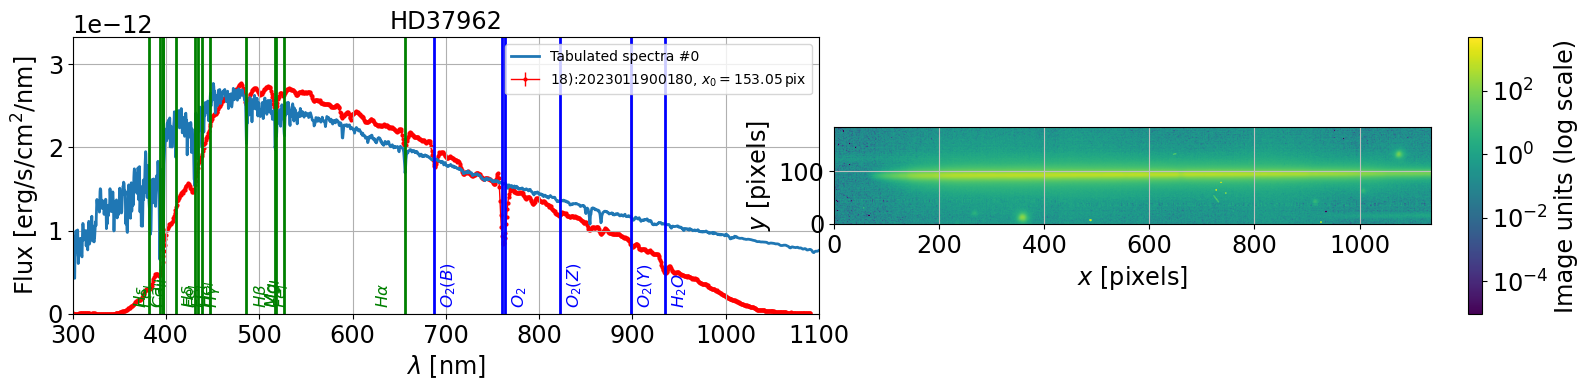

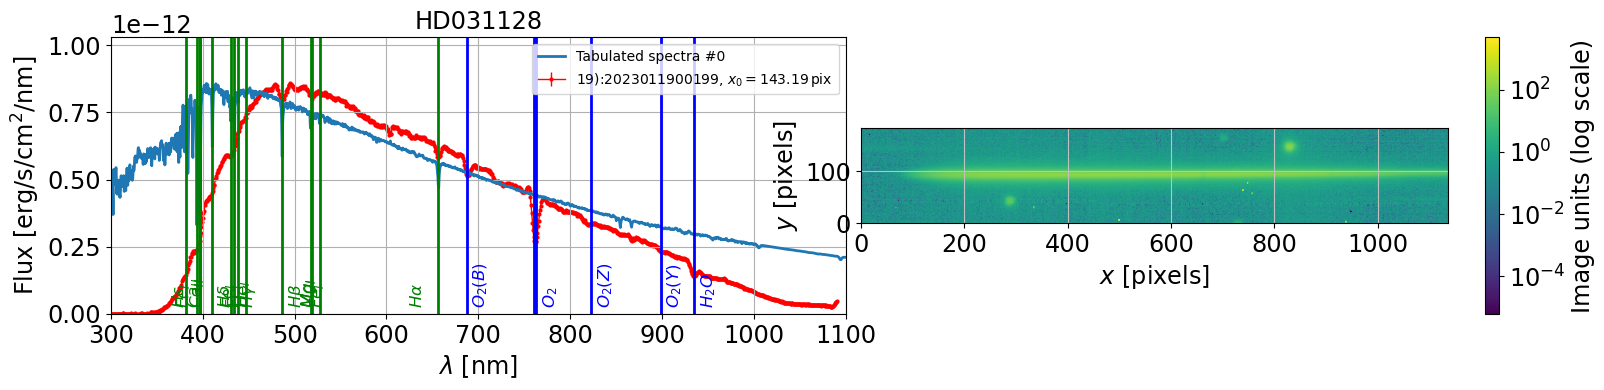

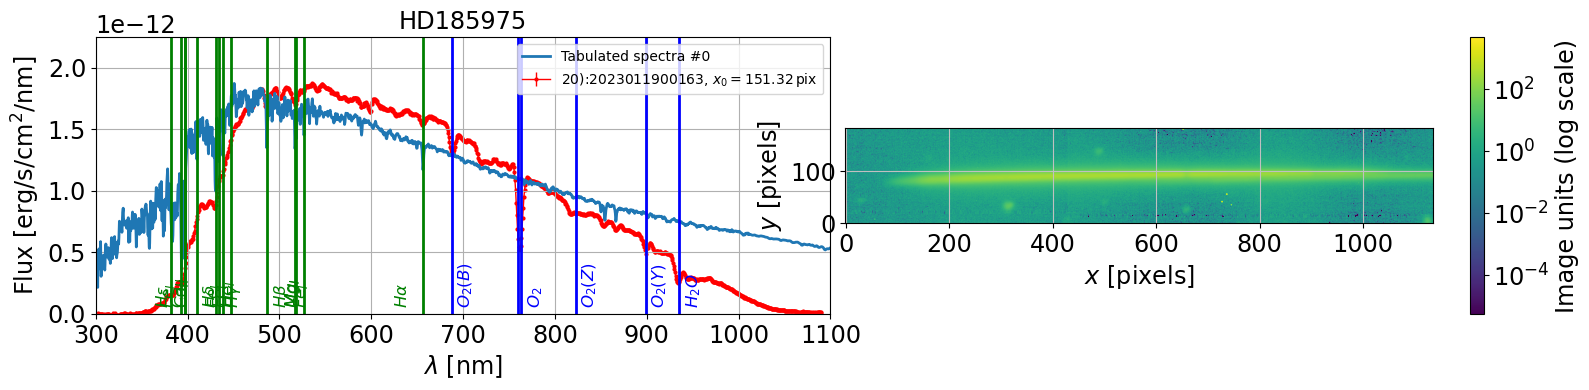

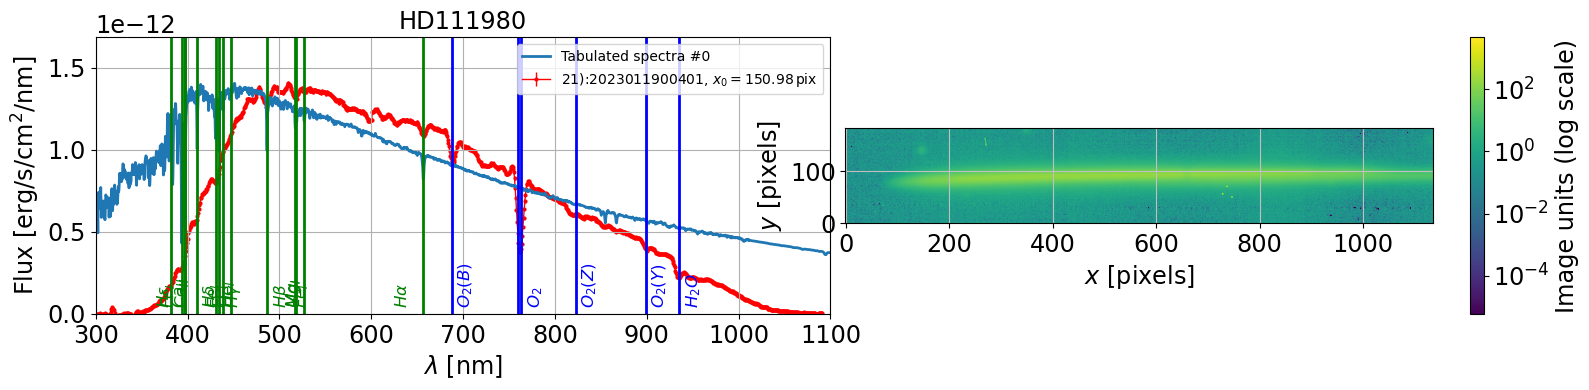

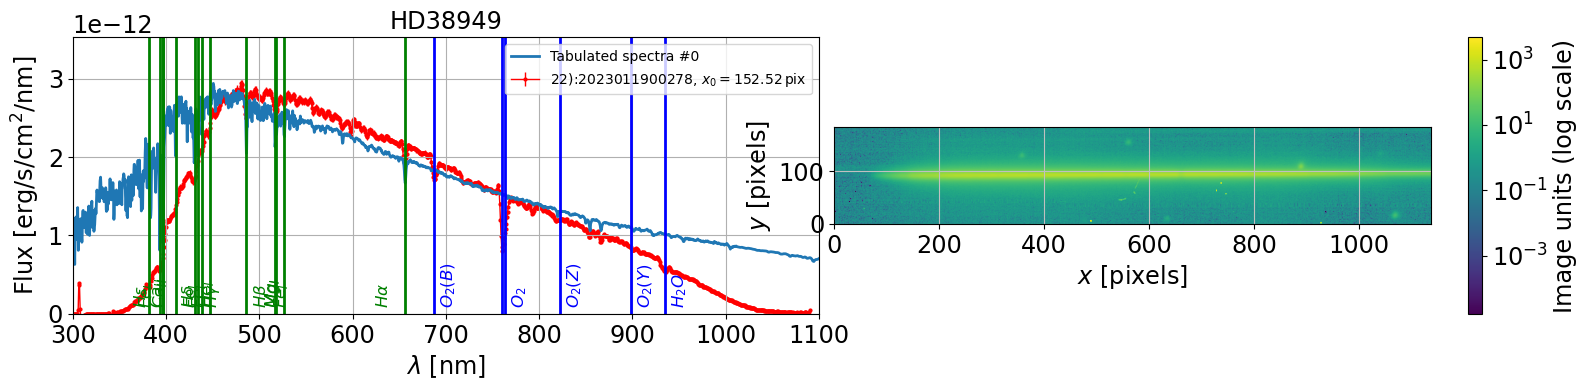

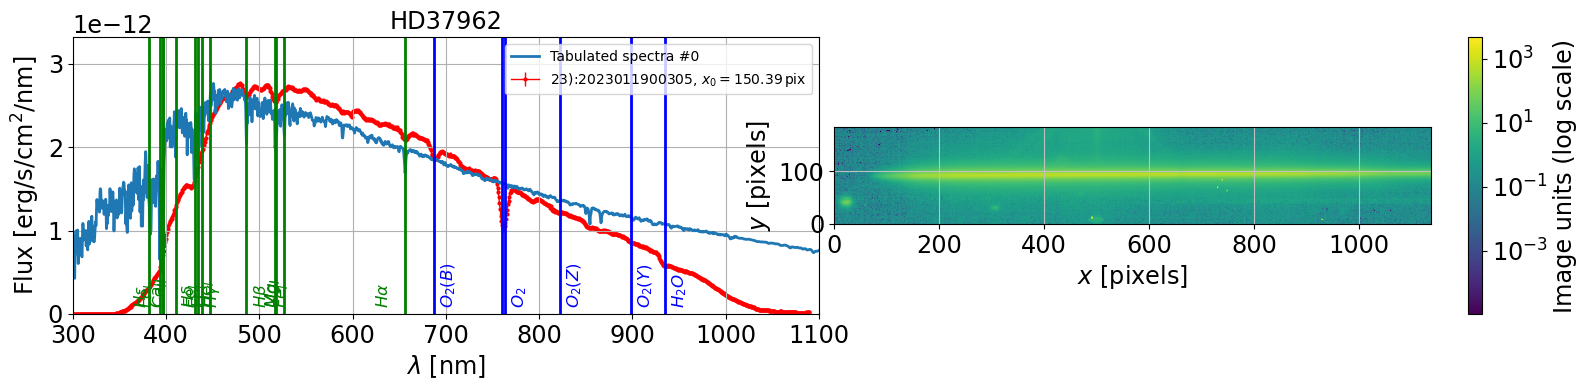

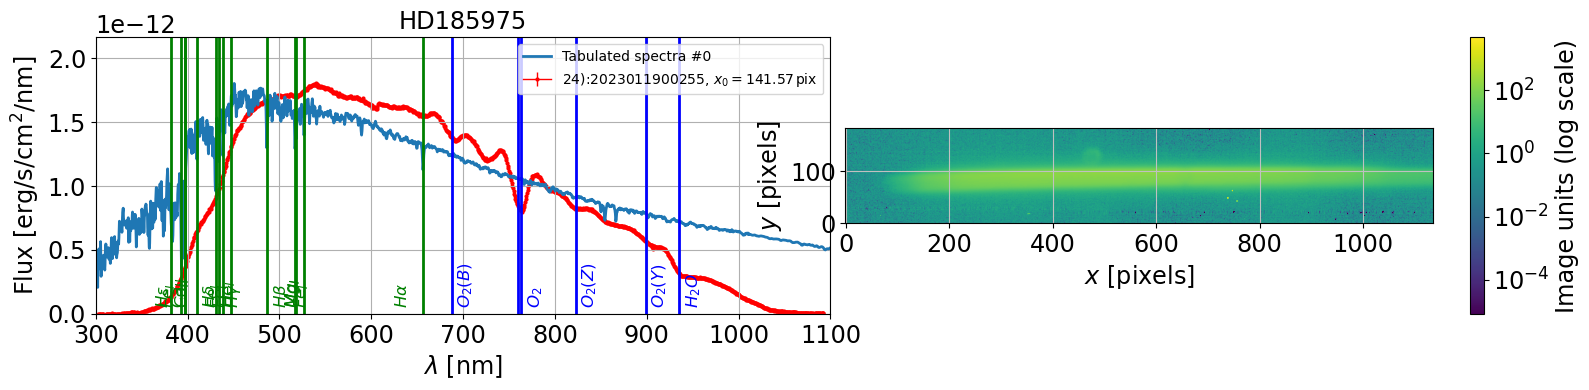

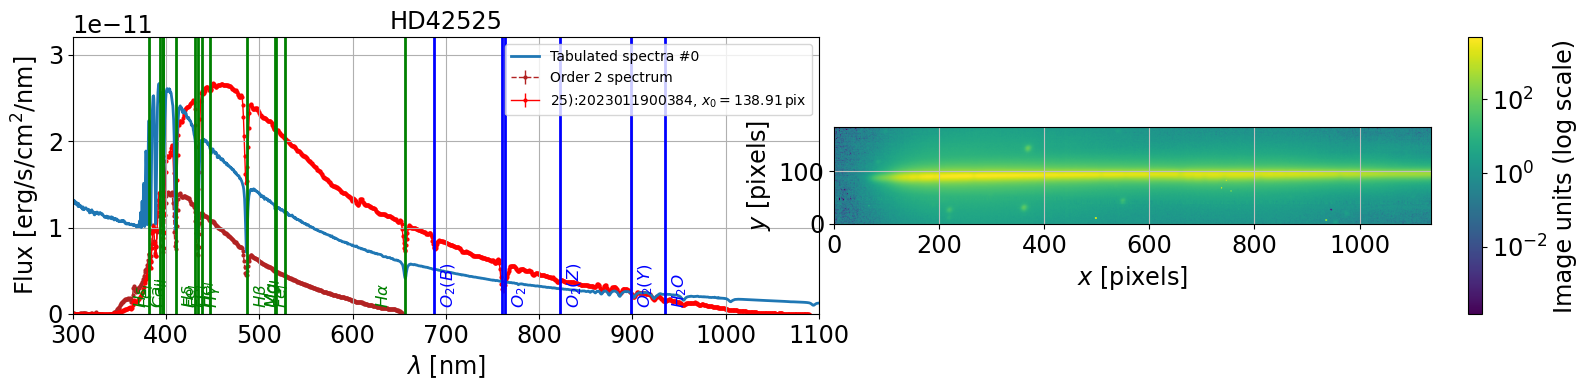

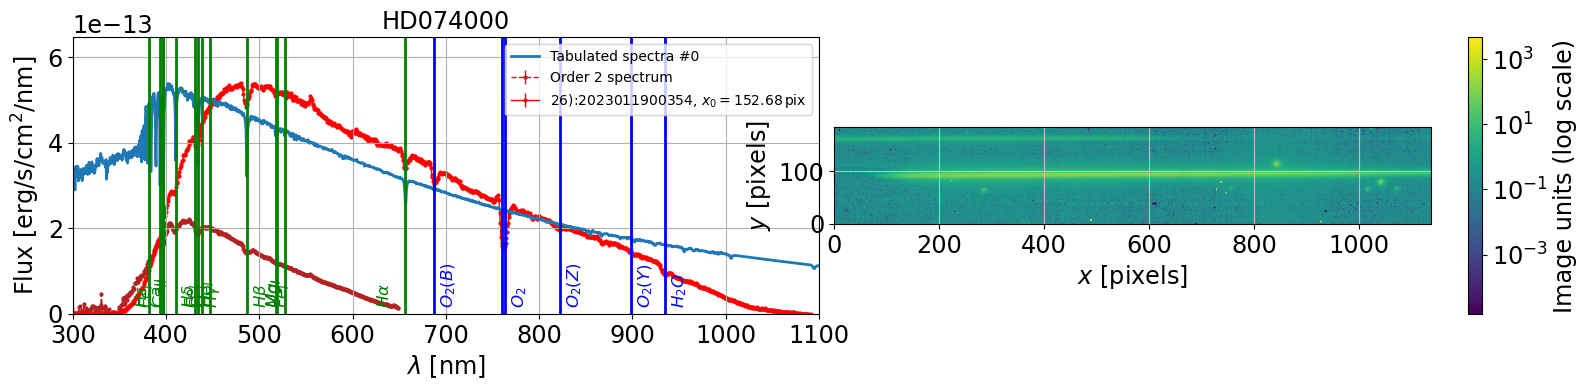

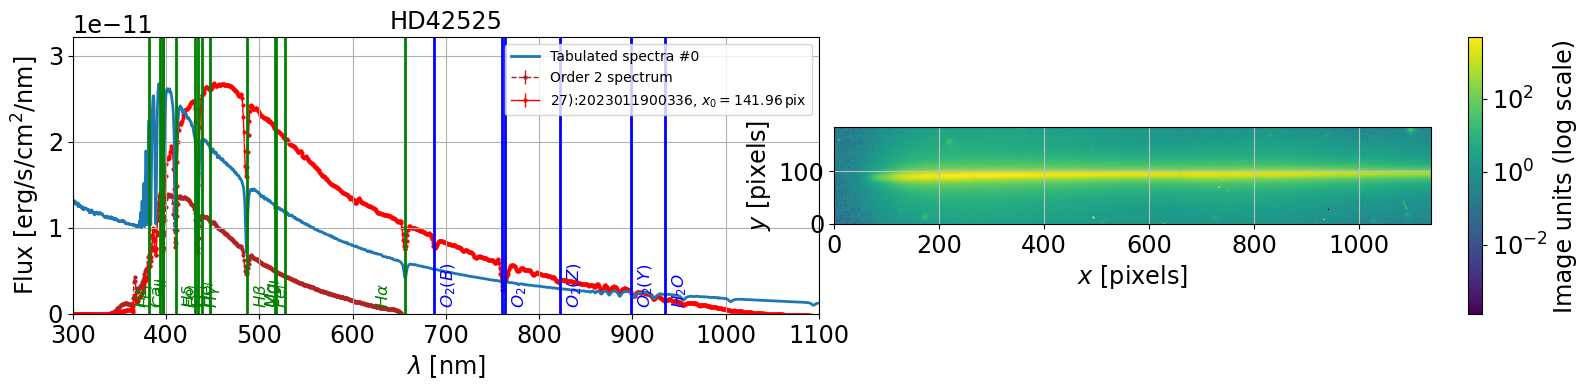

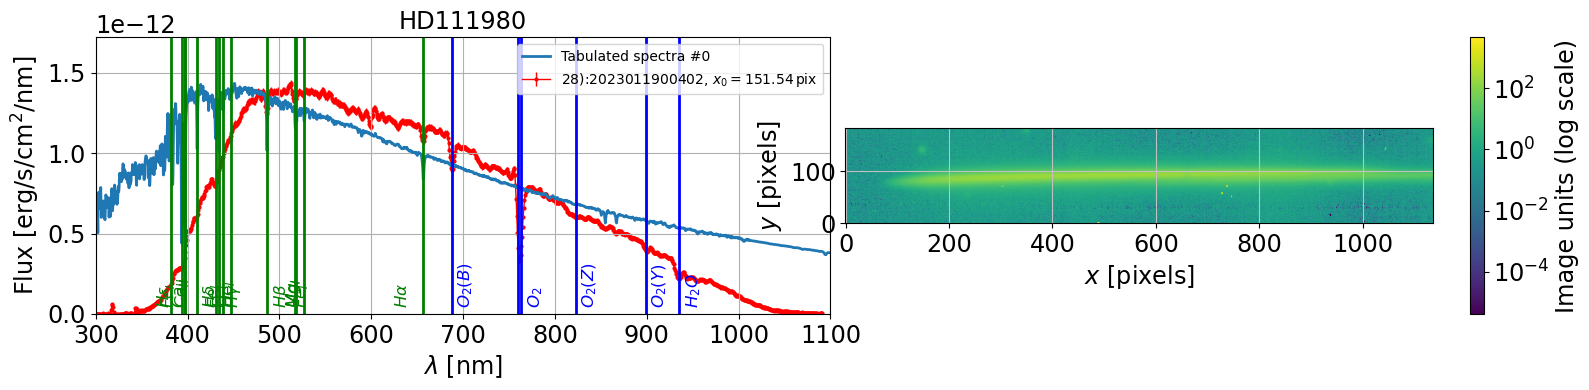

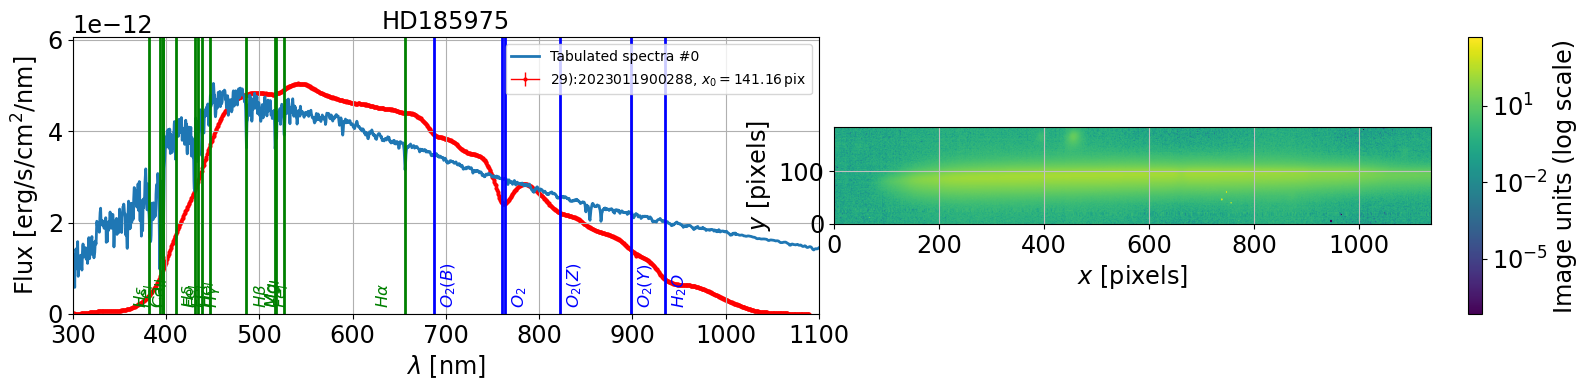

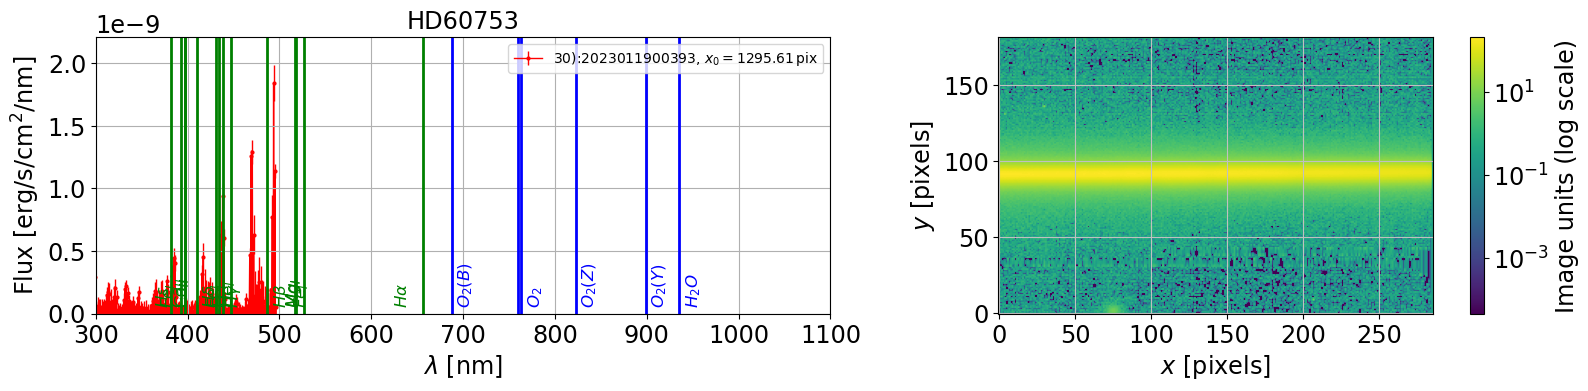

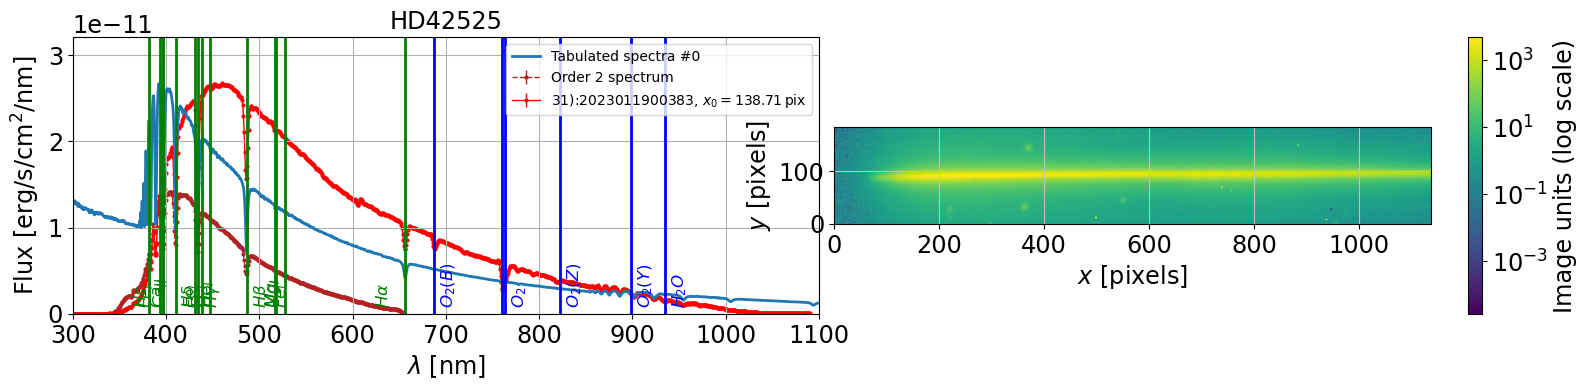

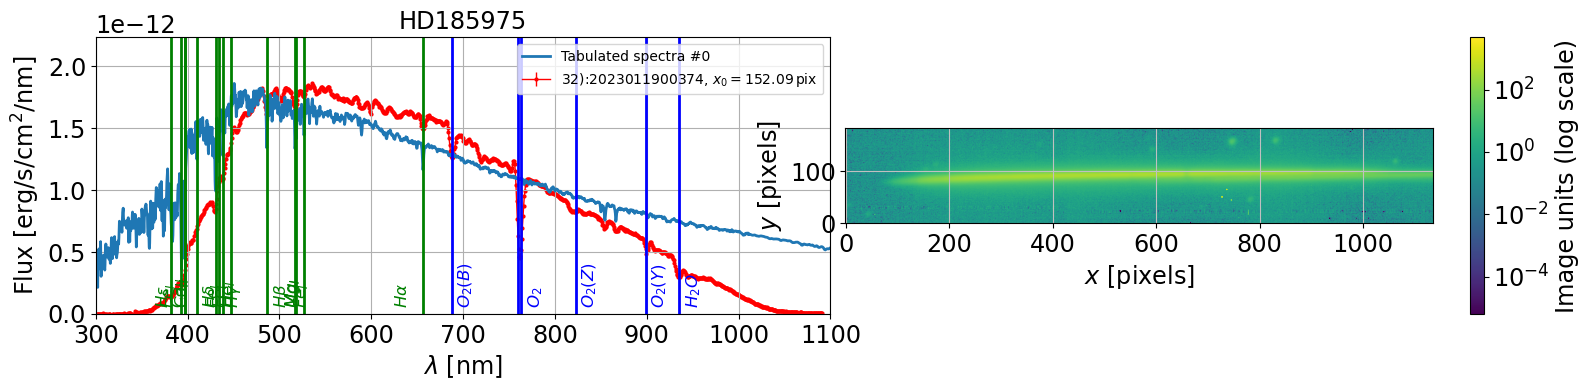

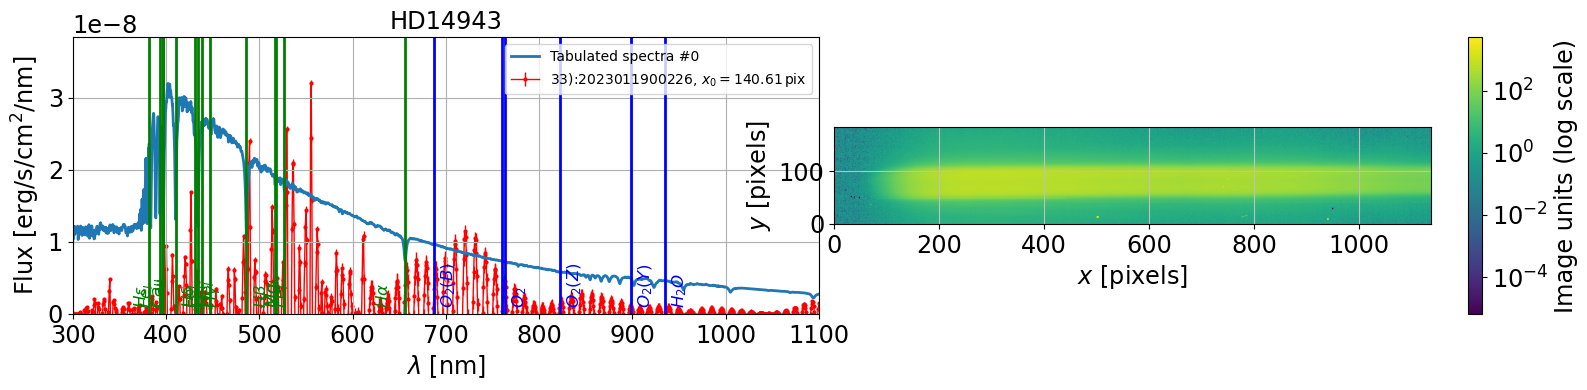

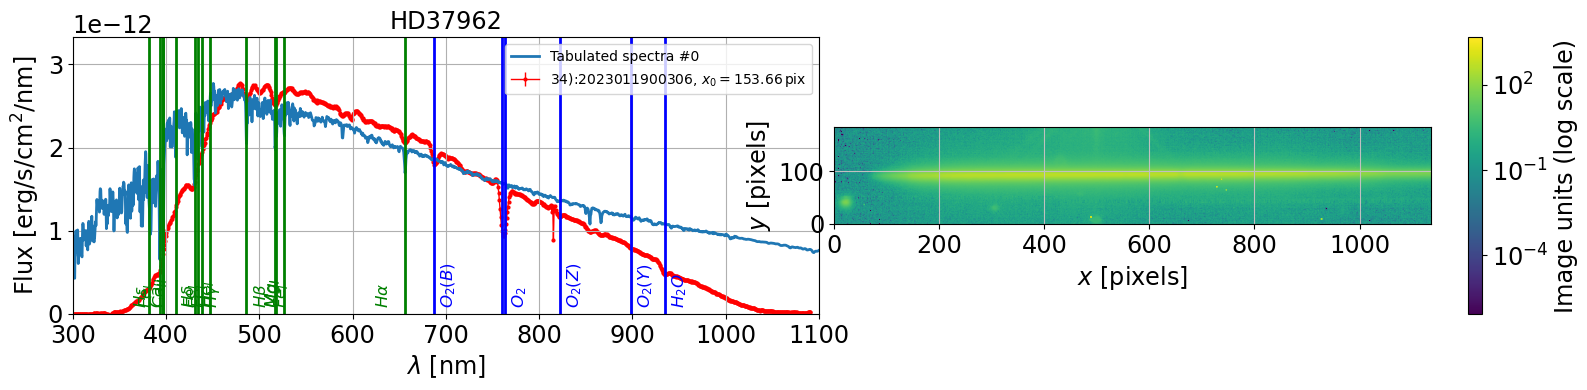

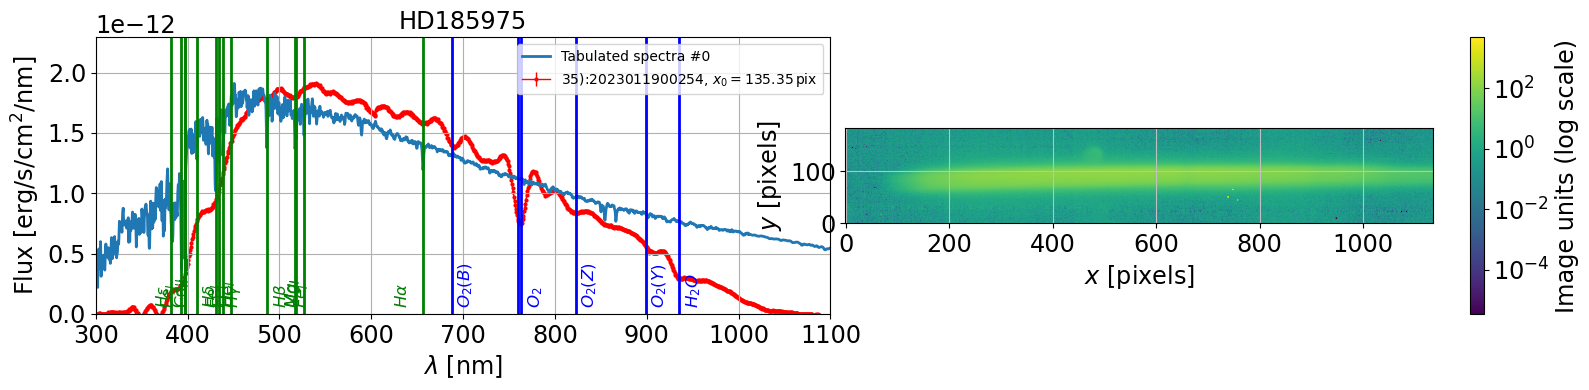

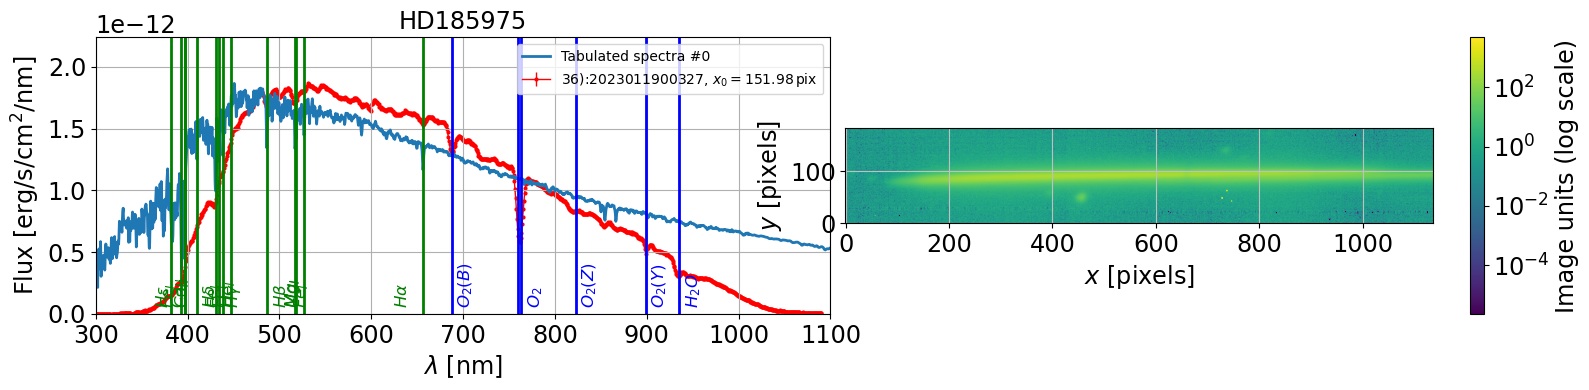

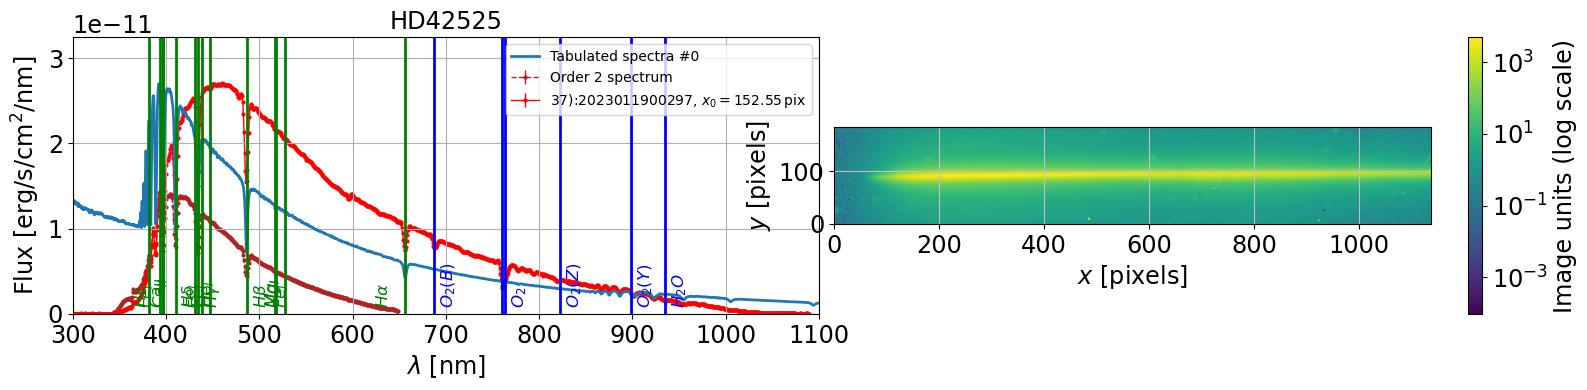

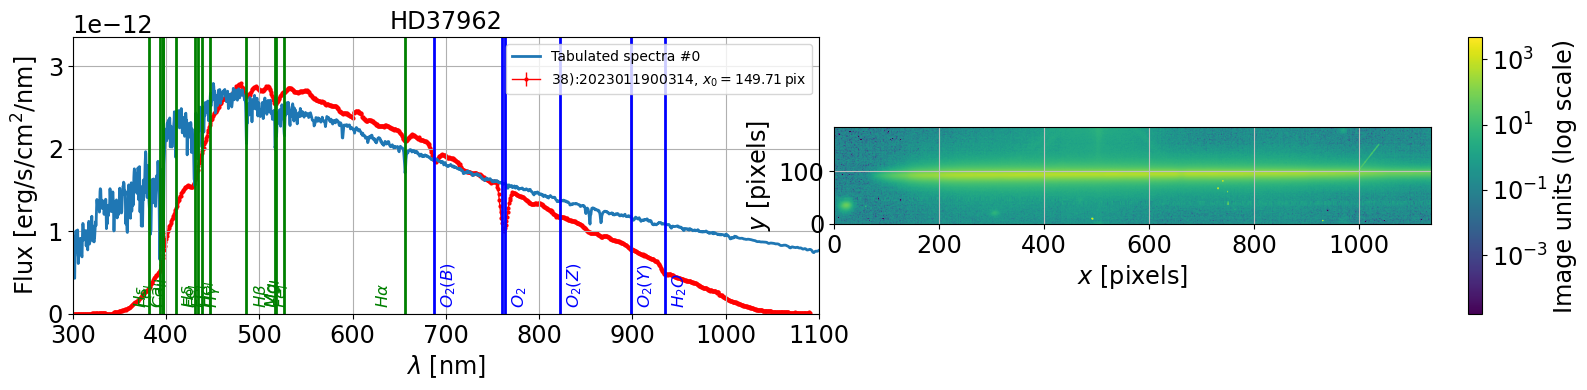

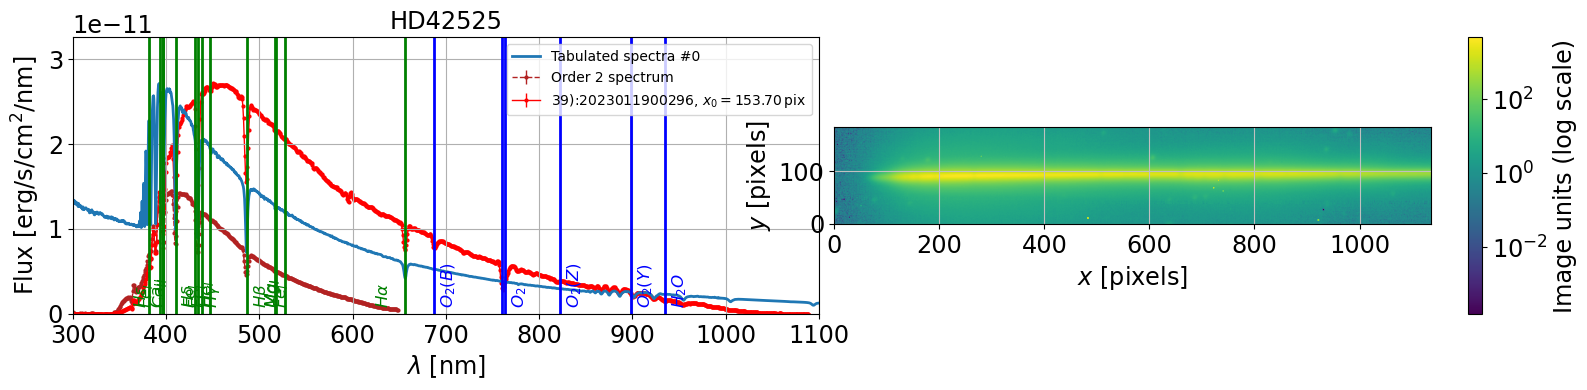

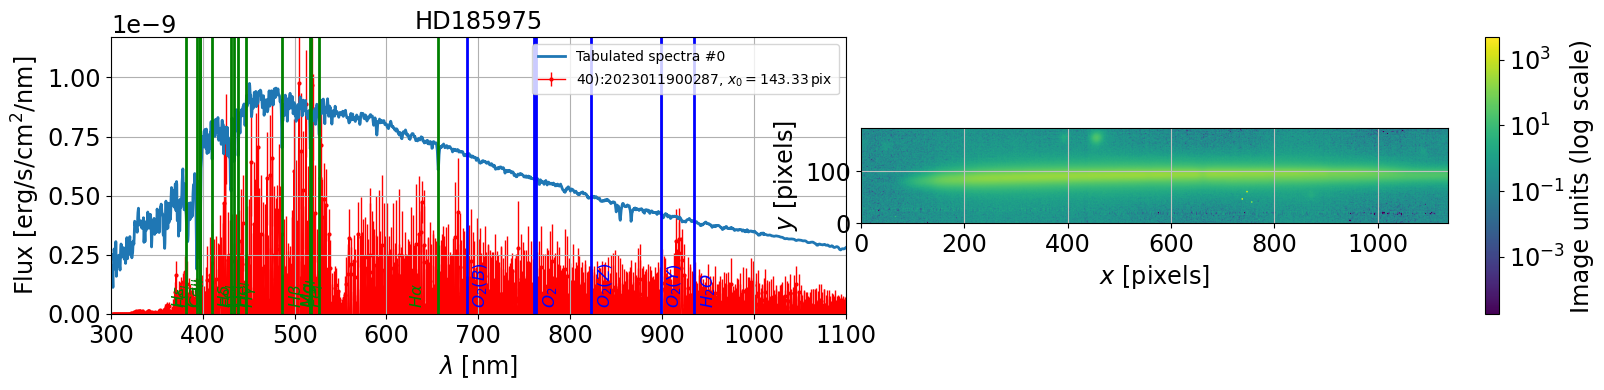

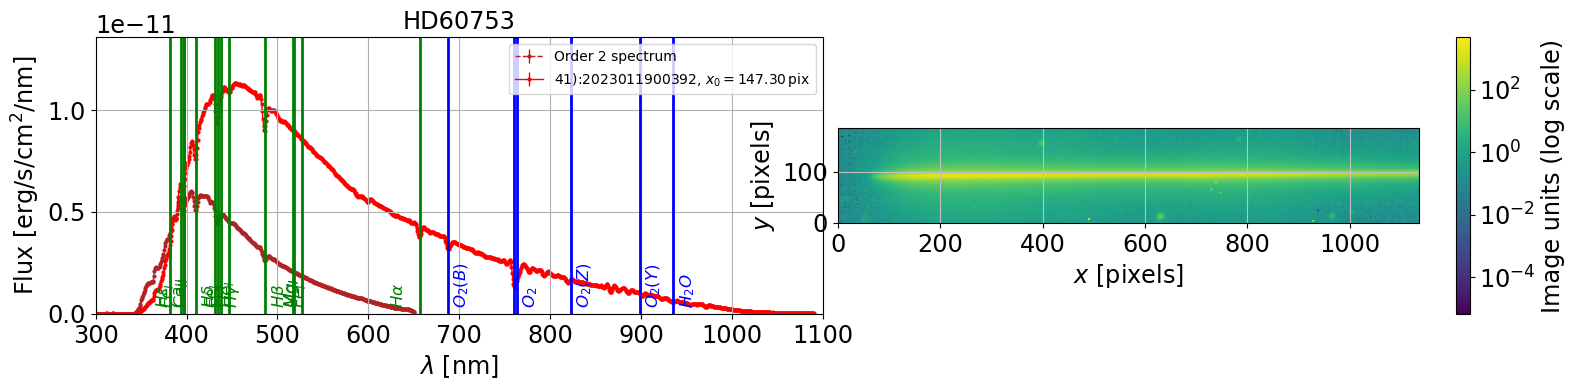

In [45]:
%matplotlib inline


infos = []
all_lambdas=[]
all_data=[]
all_data_err=[]


idx=0
for spec in all_spec:
    
    
    #s=spec.spectrum
    s=spec
    label = str(idx) +"):" + str(all_exposures[idx])
    
    try:
        fig=plt.figure(figsize=(16,4))
    
        ax1 = fig.add_subplot(1, 2, 1)
        s.plot_spectrum(ax=ax1,force_lines=True,label=label)
    
        ax2 = fig.add_subplot(1, 2, 2)
        s.plot_spectrogram(ax=ax2,scale="log")
    
        all_lambdas.append(s.lambdas)
        all_data.append(s.data)
        all_data_err.append(s.err)
    
        #save info    
        infos.append([idx,s.target.label,s.date_obs,s.airmass,s.temperature,s.pressure,s.humidity])
            
    except Exception as inst:
        print(" >>> Exception catched for "+ label )
        print(type(inst))    # the exception instance
        print(inst.args)     # arguments stored in .args

    
    idx+=1

# Generate info

In [46]:
df_infos=pd.DataFrame(infos,columns=["idx","object","date_obs","airmass","temperature","pressure","humidity"])

In [47]:
df_infos.set_index('idx',inplace=True)

In [48]:
all_reftime=[ (Time(tt)-Time( df_infos["date_obs"].values[0])).to_value(u.hr) for tt in df_infos["date_obs"].values ]

In [49]:
all_reftime=np.array(all_reftime)

In [50]:
df_infos["reftime"]=all_reftime

In [51]:
NN = len(df_infos)

In [52]:
df_infos

object                        date_obs   airmass  temperature  \
idx                                                                    
0    HD074000  2023-01-20T04:27:40.967500876Z  1.060541            0   
1    HD185975  2023-01-20T04:08:47.657997597Z  2.134563            0   
2    HD031128  2023-01-20T01:28:26.066006408Z  1.002421            0   
3     HD37962  2023-01-20T01:22:14.011998726Z  1.031428            0   
4    HD185975  2023-01-20T01:00:35.665507410Z  2.042650            0   
5     HD37962  2023-01-20T01:21:31.093503582Z  1.032129            0   
6     HD60753  2023-01-20T04:20:13.666999821Z  1.066440            0   
7    HD185975  2023-01-20T04:44:02.814992676Z  2.141326            0   
8     HD37962  2023-01-20T03:59:20.014506379Z  1.061177            0   
9    HD074000  2023-01-20T04:33:03.783505305Z  1.055123            0   
10   HD074000  2023-01-20T03:16:28.686002423Z  1.192369            0   
11   HD074000  2023-01-20T04:33:46.606005233Z  1.054447            0   
12    HD14943  2023-01-20T01:51:44.925494392Z  1.239834            0   
13    HD37962  2023-01-20T01:16:50.896504886Z  1.036902            0   
14    HD60753  2023-01-20T04:20:56.586497596Z  1.066441            0   
15    HD42525  2023-01-20T04:14:36.812005718Z  1.266357            0   
16    HD38949  2023-01-20T03:23:48.118001971Z  1.022690            0   
17   HD074000  2023-01-20T03:17:11.541495023Z  1.190384            0   
18    HD37962  2023-01-20T01:16:08.057993019Z  1.037663            0   
19   HD031128  2023-01-20T01:29:08.872994114Z  1.002306            0   
20   HD185975  2023-01-20T01:01:18.656999553Z  2.043105            0   
21   HD111980  2023-01-20T05:01:01.969502983Z  2.244746            0   
22    HD38949  2023-01-20T03:23:05.145990277Z  1.022160            0   
23    HD37962  2023-01-20T03:53:10.517004237Z  1.052869            0   
24   HD185975  2023-01-20T02:56:22.917503722Z  2.109290            0   
25    HD42525  2023-01-20T04:49:43.777994459Z  1.303685            0   
26   HD074000  2023-01-20T04:28:23.984497065Z  1.059789            0   
27    HD42525  2023-01-20T04:15:19.630999535Z  1.266971            0   
28   HD111980  2023-01-20T05:01:44.773490406Z  2.232811            0   
29   HD185975  2023-01-20T03:40:09.625002946Z  2.126125            0   
30    HD60753  2023-01-20T04:55:23.200491753Z  1.073796            0   
31    HD42525  2023-01-20T04:49:00.981501774Z  1.302783            0   
32   HD185975  2023-01-20T04:43:20.000490399Z  2.141236            0   
33    HD14943  2023-01-20T01:51:01.925490026Z  1.238150            0   
34    HD37962  2023-01-20T03:53:53.518494032Z  1.053801            0   
35   HD185975  2023-01-20T02:55:39.923490897Z  2.108973            0   
36   HD185975  2023-01-20T04:09:30.581009943Z  2.134733            0   
37    HD42525  2023-01-20T03:45:56.471995307Z  1.246208            0   
38    HD37962  2023-01-20T03:58:37.018499664Z  1.060175            0   
39    HD42525  2023-01-20T03:45:13.656493031Z  1.245822            0   
40   HD185975  2023-01-20T03:39:26.815009412Z  2.125891            0   
41    HD60753  2023-01-20T04:54:40.190990302Z  1.073500            0   

     pressure  humidity   reftime  
idx                                
0           0         0  0.000000  
1           0         0 -0.314808  
2           0         0 -2.987473  
3           0         0 -3.090821  
4           0         0 -3.451473  
5           0         0 -3.102743  
6           0         0 -0.124250  
7           0         0  0.272735  
8           0         0 -0.472487  
9           0         0  0.089671  
10          0         0 -1.186745  
11          0         0  0.101566  
12          0         0 -2.598901  
13          0         0 -3.180575  
14          0         0 -0.112328  
15          0         0 -0.217821  
16          0         0 -1.064680  
17          0         0 -1.174841  
18          0         0 -3.192475  
19          0         0 -2.975582  
20          0         0 -3.439531  
21        

### Save info file

In [53]:
df_infos.to_csv(summary_file)